In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
from scipy import stats

import os
if not os.getcwd().endswith('src'):
    os.chdir('../src')
import sys
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from preprocessing_utils import get_drugs_list
from conf import DISEASE, MITH_IN_DRUG, MITH_OUT_DRUG, CS_DIR, \
 TSR_OUT_DRUG,TSR_OUT_DISEASE, TSR_OUT_CSCORE,IMG_DIR, alias_2geneid
from loader import load_disease_signature, load_single_drug_signature, load_drug_signatures
from plot_drugs_signatures_correlations import compare_deg_and_mith_genes,  prop_agreeing_signs, print_correlations, plot_correlation, plot_10_most_correlated
print(DISEASE)
pert_times=['6h','24h','6h_24h'] 



ipf


# Functions


In [83]:
def top_ranking_drugs(data, cs=-1.95, pval=1, n_best=20):
    '''
    Prints top ranking drugs with given cs and pvalue
    '''
    drugs=data[['disease','drug','connectivity_score','cs_p_value','perturbation_time']][data['connectivity_score']<=cs][data['cs_p_value']<=pval].sort_values(by='connectivity_score')
    print(len(drugs), 'with connectivity score <=',cs,'and P value<=',pval)
    return drugs.head(n_best)

def plot_hist(DEG_cs_data=False, mith_cs_data=False, colname='connectivity_score', pert_times=['6h','24h','6h_24h']):
 
    for pert_time in pert_times:
        if not type(DEG_cs_data)==bool:
            plt.hist(DEG_cs_data[DEG_cs_data.perturbation_time==pert_time][colname], label='DEG', alpha=0.8, bins=100)
            print(DEG_cs_data[DEG_cs_data.perturbation_time==pert_time].shape)
        if not type(mith_cs_data)==bool:
            print(mith_cs_data[mith_cs_data.perturbation_time==pert_time].shape)
            plt.hist(mith_cs_data[mith_cs_data.perturbation_time==pert_time][colname], label='mith', alpha=0.5, bins=100)
        
        plt.grid(linestyle='--')
        plt.xlim(-2,2)
        plt.title(pert_time)
        plt.legend()
        plt.show()

# <div align="center"><b>Data exploration: comparison between FC and MITHrIL data</b>

## filtered DEG data:


In [23]:
DEG_signature_disease=load_disease_signature(DISEASE)
DEG_signature_disease

,gene,DE_log2_FC,std.error,t.value,p.value,adj.p.value,gene_id
0,A1BG,0.394082,0.155932,2.527274,0.015539,0.033684,1
1,A1BG-AS1,-0.053794,0.196272,-0.274081,0.785429,0.836482,503538
2,A2M-AS1,0.158941,0.183335,0.866943,0.391130,0.485167,144571
3,A4GALT,0.846013,0.155536,5.439343,0.000003,0.000024,53947
4,AAAS,-0.121765,0.098836,-1.231993,0.225126,0.309680,8086
...,...,...,...,...,...,...,...
14868,ZXDC,-0.249938,0.058799,-4.250716,0.000124,0.000579,79364
14869,ZYG11B,-0.057815,0.085105,-0.679332,0.500829,0.591056,79699
14870,ZYX,0.264760,0.138895,1.906194,0.063808,0.109409,7791
14871,ZZEF1,0.018773,0.086757,0.216382,0.829787,0.872128,23140


## Mith 3 data 

In [6]:
DISEASE

'ipf'

In [18]:
filename=DISEASE+'_mith3_signature.csv'
mith_signature_disease=load_disease_signature(DISEASE, mith=True)
mith_signature_disease.sort_values(by='Perturbation')

,gene_id,gene,Perturbation,adj.p.value
11250,cpd:C00086,Urea,-8.060392,0.159685
11254,6563,SLC14A1,-5.099490,0.159685
11569,cpd:C00378,Thiamine,-4.395903,0.322189
4541,5468,PPARG,-3.784962,0.442259
1493,2354,FOSB,-3.479748,0.001449
...,...,...,...,...
80,chebi:37565,GTP(4-),46.728046,0.789401
1089,cpd:C00080,H+,62.156667,0.494321
85,chebi:58189,GDP(3-),70.068738,0.526244
15,chebi:43474,hydrogenphosphate,124.495489,0.512412


## Note: 
Genes in mithril3 are actually genes, microRNas AND metabolites.

Always refer to gene id column

do not trust 'gene' column, since it has some duplicates among the metabolytes (but they have different IDs in the gene_id colun):

## Comparison of genes missing from mithril output bur present in DEG (filtered for duplicates and gene id) data:

In [24]:
DEG_disease_common, mith_disease_common=compare_deg_and_mith_genes(DEG_signature_disease, mith_signature_disease)

missing genes from mithril 7069
addional_mith_items 7043
genes in common 7804
riprova: common genes+ additional mithril items == len(mithril_gene)? True
riprova: common genes+ missing mithril items == len(DEG_genees)? True


## Which of these mithril data are metabolytes and miRNAs?

In [19]:
disease_signature_sm  = mith_signature_disease[~mith_signature_disease['gene_id'].isin([str(x) for x in alias_2geneid.values()])]
disease_signature_sm

,gene_id,gene,Perturbation,adj.p.value
1,chebi:456216,ADP(3-),154.036681,0.451160
3,chebi:30616,ATP(4-),32.574337,0.462561
15,chebi:43474,hydrogenphosphate,124.495489,0.512412
16,cpd:C00001,H2O,41.378807,0.492244
26,hsa-miR-199b-3p,hsa-miR-199b-3p,0.003061,0.688196
...,...,...,...,...
14836,gl:G13150,(GlcN)1 (Ino(acyl)-P)1 (Man)3 (EtN)3 (P)3 (pro...,-0.024557,0.526244
14837,gl:G10610,UDP-N-acetyl-D-glucosamine,-0.000003,0.526244
14839,gl:G13151,(GlcN)1 (Man)3 (EtN)3 (P)3 (protein)1 (Ino-P)1,-0.405927,0.512412
14845,gl:G00711,(GlcA)1 (GlcNAc)2,0.349129,0.462561


In [80]:
# histograms with cmmon genes

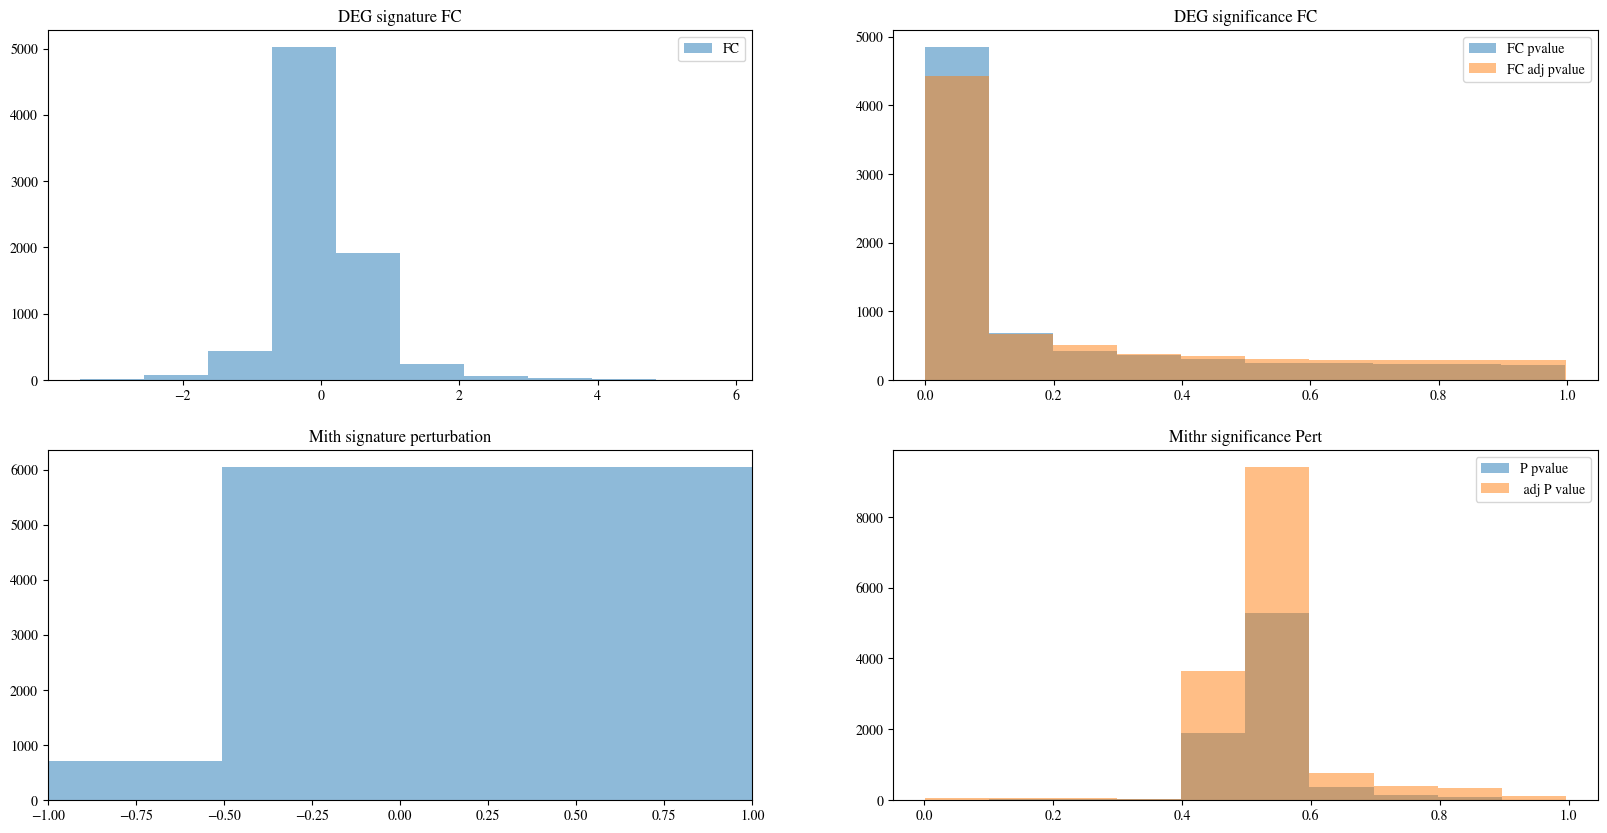

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ax[0,0].hist(DEG_disease_common['DE_log2_FC'], label='FC', alpha=0.5)
ax[1,0].hist(mith_disease_common['Perturbation'], label='P', alpha=0.5)
ax[1,0].set_xlim(-1,1)
ax[0,0].set_title('DEG signature FC')
ax[1,0].set_title('Mith signature perturbation')
ax[0,0].legend()
ax[0,1].legend()

ax[0,1].hist(DEG_disease_common['p.value'], label='FC pvalue', alpha=0.5)
ax[0,1].hist(DEG_disease_common['adj.p.value'], label='FC adj pvalue', alpha=0.5)

ax[1,1].hist(mith_disease_common['adj.p.value'], label='P pvalue', alpha=0.5)
ax[1,1].hist(mith_signature_disease['adj.p.value'], label=' adj P value', alpha=0.5)
ax[0,1].set_title('DEG significance FC')
ax[1,1].set_title('Mithr significance Pert')
ax[0,1].legend()
ax[1,1].legend()



In [82]:
# controllare metaboliti e mirna significativita e foldchange

FC più spread out, pvalue piu uniformi, Perturbations piu uniformi, pvalue più bimodali. 
However, adjusted pvalues in MITHrIL differ from normal p values, greatly limiting significance

## Correlations between FC and  MITHrIL perturbations
for common genes between tsr data and mithril data

Pearson cc: PearsonRResult(statistic=np.float64(0.004061446316766358), pvalue=np.float64(0.7197946932950001)) 
Spearman cc: SignificanceResult(statistic=np.float64(0.01365252110108299), pvalue=np.float64(0.2278444253345246))


(PearsonRResult(statistic=np.float64(0.004061446316766358), pvalue=np.float64(0.7197946932950001)),
 SignificanceResult(statistic=np.float64(0.01365252110108299), pvalue=np.float64(0.2278444253345246)))

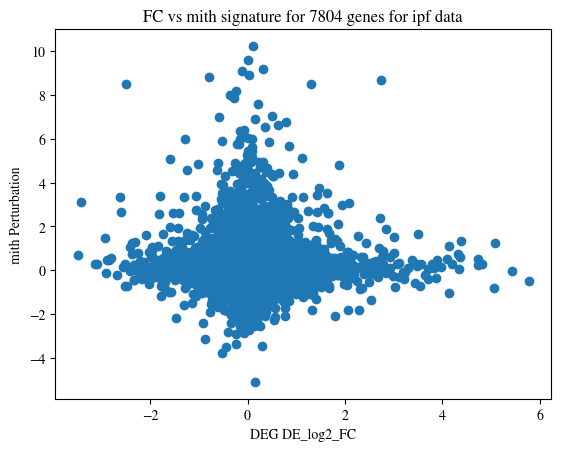

In [28]:
print_correlations(DEG_disease_common,  mith_disease_common,\
                       DEG_col='DE_log2_FC', mith_col='Perturbation',data_name=DISEASE)

Pearson cc: PearsonRResult(statistic=np.float64(-0.01545226158674351), pvalue=np.float64(0.17227835532007726)) 
Spearman cc: SignificanceResult(statistic=np.float64(-0.03402660232334457), pvalue=np.float64(0.0026444136000891884))


(PearsonRResult(statistic=np.float64(-0.01545226158674351), pvalue=np.float64(0.17227835532007726)),
 SignificanceResult(statistic=np.float64(-0.03402660232334457), pvalue=np.float64(0.0026444136000891884)))

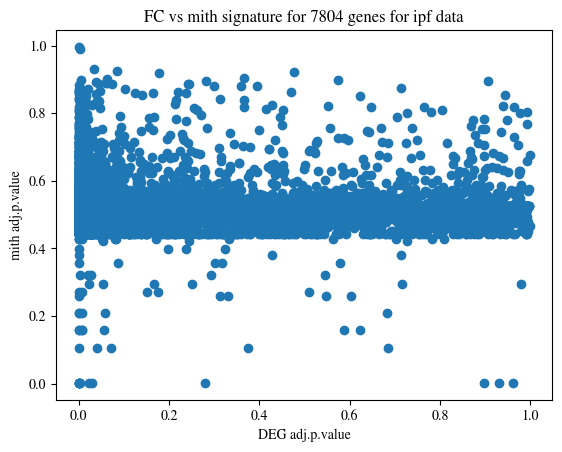

In [29]:
print_correlations(DEG_disease_common,  mith_disease_common,\
                       DEG_col='adj.p.value', mith_col='adj.p.value',data_name=DISEASE)

In [33]:
# tanti dei geni significativi per tsr non lo sono per mithril!

## Is there a correlation between signs?

In [30]:
mith_disease_common['sign']=mith_disease_common.Perturbation.apply(lambda x : np.where(x>0,1,0))
DEG_disease_common['sign']=DEG_disease_common.DE_log2_FC.apply(lambda x : np.where(x>0,1,0))

prop_agreeing_signs(DEG_disease_common, mith_disease_common, sign_col='sign')

0.8744233726294208

YES!

## DEG LINCS data


DEG Drug wise ordering of metanalysis files, converted from gene-wise ordering of metanalysis files

In [5]:
drugs_DEG_signatures= load_drug_signatures(mith=False, pkl=True)

loading all drug signatures...
1 drugs loaded


In [6]:
drugs_DEG_signatures.drug.unique()

array(['ibuprofen'], dtype=object)

## Using a single random drug as example:
ex_drug='pseudoephedrine'

In [7]:
ex_drug='ibuprofen'
ex_drug_DEG_signature=load_single_drug_signature(ex_drug)
ex_drug_DEG_signature

,gene,drug,DE_log2_FC_6h,std.error_6h,t.value_6h,p.value_6h,adj.p.value_6h,DE_log2_FC_24h,std.error_24h,t.value_24h,p.value_24h,adj.p.value_24h,DE_log2_FC_6h_24h,std.error_6h_24h,t.value_6h_24h,p.value_6h_24h,gene_id
0,A2M,ibuprofen,-0.139099,0.175280,-0.793584,0.427438,0.773377,0.098812,0.215370,0.458799,0.646379,0.875154,-0.044305,0.135947,-0.325898,0.744501,3494
1,A4GALT,ibuprofen,0.017596,0.045795,0.384221,0.700815,0.961708,0.108390,0.055132,1.966020,0.049296,0.354559,0.057804,0.045100,1.281686,0.199953,53947
2,AAAS,ibuprofen,0.006481,0.047413,0.136694,0.891273,0.967995,-0.038132,0.051690,-0.737698,0.460698,0.752341,-0.013903,0.034940,-0.397918,0.690691,8086
3,AACS,ibuprofen,-0.203467,0.088995,-2.286280,0.022238,0.167407,0.141628,0.104720,1.352441,0.176234,0.527720,-0.035333,0.172491,-0.204841,0.837697,65985
4,AADAC,ibuprofen,0.001028,0.091233,0.011271,0.991007,0.996773,0.081372,0.108646,0.748965,0.453879,0.873966,0.034253,0.069867,0.490267,0.623945,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9887,ZWINT,ibuprofen,0.024556,0.086021,0.285462,0.775290,0.928499,-0.089084,0.116352,-0.765638,0.443892,0.648332,-0.015606,0.069170,-0.225622,0.821496,11130
9888,ZXDC,ibuprofen,0.018349,0.052044,0.352563,0.724416,0.931824,-0.042083,0.062343,-0.675034,0.499654,0.850002,-0.006470,0.039953,-0.161950,0.871345,79364
9889,ZYX,ibuprofen,-0.019286,0.110654,-0.174288,0.861639,0.972092,0.024716,0.126751,0.194999,0.845394,0.965121,-0.000255,0.083358,-0.003054,0.997563,7791
9890,ZZEF1,ibuprofen,-0.013113,0.063412,-0.206786,0.836177,0.950943,0.145124,0.075533,1.921326,0.054691,0.347137,0.060684,0.078939,0.768742,0.442047,23140


## mith3 LINCS data

mith3 output filtering: (see map_mith3_output_to_metanalysis_drug_wise.py)

REMOVING drugs with special characters: 35 drugs, 

IGNORING synonym (non unique) gene symbols (9 (ignorati per ora)),

Convert into connectivity calculation input:
input: DRUG_timestep.perturbation.txt,
57422 rows × 8 columns (Pathway Id 	Pathway Name 	Gene Id 	Gene Name 	Perturbation 	Accumulator 	pValue 	adj_pValue)
every row is one gene  per one patwhay.
Maps to tsr metanalysis file pronto per essere preso in input dal connectivity score, concatenando i 3 timestep perturbations, e levando le pathway e tenendo una row per gene (geni uguali in pathway diverse hanno la stessa perturbation value ,quindi il mith3 output è i nrealta pieno di doppioni), e agginugendo una t-value like statistic (chè non è proprio uguale al tvalue xke il tvalue ha anche il segno)

In [9]:
ex_drug_mith_signature = load_single_drug_signature(ex_drug, mith=True)
ex_drug_mith_signature

,gene_id,gene_x,Perturbation_6h,p.value_6h,adj.p.value_6h,drug,gene_y,Perturbation_24h,p.value_24h,adj.p.value_24h,gene,Perturbation_6h_24h,p.value_6h_24h,adj.p.value_6h_24h
0,6197,"RPS6KA3, CLS, HU-3, ISPK-1, MAPKAPK1B, MRX19, ...",0.108752,0.071964,0.455552,ibuprofen,"RPS6KA3, CLS, HU-3, ISPK-1, MAPKAPK1B, MRX19, ...",-0.172127,0.099450,0.443690,"RPS6KA3, CLS, HU-3, ISPK-1, MAPKAPK1B, MRX19, ...",-0.026266,0.369315,0.493809
1,chebi:456216,ADP(3-),0.088231,0.151424,0.482957,ibuprofen,ADP(3-),0.104329,0.195902,0.483333,ADP(3-),0.094330,0.095952,0.436294
2,6196,"RPS6KA2, HU-2, MAPKAPK1C, RSK, RSK3, S6K-alpha...",-0.137046,0.049975,0.437404,ibuprofen,"RPS6KA2, HU-2, MAPKAPK1C, RSK, RSK3, S6K-alpha...",0.169195,0.070465,0.425757,"RPS6KA2, HU-2, MAPKAPK1C, RSK, RSK3, S6K-alpha...",0.008413,0.390305,0.497234
3,chebi:30616,ATP(4-),0.002488,0.471764,0.505845,ibuprofen,ATP(4-),-0.008040,0.382309,0.491034,ATP(4-),-0.002013,0.447276,0.497446
4,5594,"MAPK1, ERK, ERK-2, ERK2, ERT1, MAPK2, NS13, P4...",0.110522,0.090955,0.465835,ibuprofen,"MAPK1, ERK, ERK-2, ERK2, ERT1, MAPK2, NS13, P4...",-0.146895,0.155422,0.472934,"MAPK1, ERK, ERK-2, ERK2, ERT1, MAPK2, NS13, P4...",-0.017847,0.449275,0.497693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,gl:G00711,(GlcA)1 (GlcNAc)2,-0.004423,0.282859,0.488593,ibuprofen,(GlcA)1 (GlcNAc)2,-0.000521,0.508246,0.525889,(GlcA)1 (GlcNAc)2,-0.002852,0.356322,0.490738
15821,gl:G00526,(GlcA)2 (GlcNAc)2,-0.044570,0.162919,0.484850,ibuprofen,(GlcA)2 (GlcNAc)2,-0.018917,0.472764,0.506926,(GlcA)2 (GlcNAc)2,-0.034767,0.238381,0.473788
15822,cpd:C00999,Ferrocytochrome b5,0.023657,0.132934,0.482957,ibuprofen,Ferrocytochrome b5,0.005277,0.359820,0.491034,Ferrocytochrome b5,0.015745,0.171414,0.466933
15823,123956252,RIPPLY2-CYB5R4,0.000274,0.421789,0.505845,ibuprofen,RIPPLY2-CYB5R4,-0.018452,0.002499,0.316308,RIPPLY2-CYB5R4,-0.008102,0.023988,0.369588


In [4]:
drugs_mith_signatures=load_drug_signatures(mith=True)
drugs_mith_signatures

loading all drug signatures...
2 drugs loaded


,gene_id,gene_x,Perturbation_6h,p.value_6h,adj.p.value_6h,drug,gene_y,Perturbation_24h,p.value_24h,adj.p.value_24h,gene,Perturbation_6h_24h,p.value_6h_24h,adj.p.value_6h_24h
0,6197,"RPS6KA3, CLS, HU-3, ISPK-1, MAPKAPK1B, MRX19, ...",0.108752,0.071964,0.455552,ibuprofen,"RPS6KA3, CLS, HU-3, ISPK-1, MAPKAPK1B, MRX19, ...",-0.172127,0.099450,0.443690,"RPS6KA3, CLS, HU-3, ISPK-1, MAPKAPK1B, MRX19, ...",-0.026266,0.369315,0.493809
1,chebi:456216,ADP(3-),0.088231,0.151424,0.482957,ibuprofen,ADP(3-),0.104329,0.195902,0.483333,ADP(3-),0.094330,0.095952,0.436294
2,6196,"RPS6KA2, HU-2, MAPKAPK1C, RSK, RSK3, S6K-alpha...",-0.137046,0.049975,0.437404,ibuprofen,"RPS6KA2, HU-2, MAPKAPK1C, RSK, RSK3, S6K-alpha...",0.169195,0.070465,0.425757,"RPS6KA2, HU-2, MAPKAPK1C, RSK, RSK3, S6K-alpha...",0.008413,0.390305,0.497234
3,chebi:30616,ATP(4-),0.002488,0.471764,0.505845,ibuprofen,ATP(4-),-0.008040,0.382309,0.491034,ATP(4-),-0.002013,0.447276,0.497446
4,5594,"MAPK1, ERK, ERK-2, ERK2, ERT1, MAPK2, NS13, P4...",0.110522,0.090955,0.465835,ibuprofen,"MAPK1, ERK, ERK-2, ERK2, ERT1, MAPK2, NS13, P4...",-0.146895,0.155422,0.472934,"MAPK1, ERK, ERK-2, ERK2, ERT1, MAPK2, NS13, P4...",-0.017847,0.449275,0.497693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,gl:G00711,(GlcA)1 (GlcNAc)2,0.007442,0.272364,0.462650,ibuprofen--S-,(GlcA)1 (GlcNAc)2,-0.000894,0.513743,0.541217,(GlcA)1 (GlcNAc)2,0.003507,0.294853,0.476463
15821,gl:G00526,(GlcA)2 (GlcNAc)2,-0.002483,0.383308,0.486749,ibuprofen--S-,(GlcA)2 (GlcNAc)2,-0.042115,0.367816,0.481933,(GlcA)2 (GlcNAc)2,-0.022356,0.313843,0.481088
15822,cpd:C00999,Ferrocytochrome b5,0.016635,0.403298,0.490362,ibuprofen--S-,Ferrocytochrome b5,-0.070701,0.067966,0.379466,Ferrocytochrome b5,-0.025159,0.170915,0.441885
15823,123956252,RIPPLY2-CYB5R4,0.001599,0.447776,0.498185,ibuprofen--S-,RIPPLY2-CYB5R4,-0.014294,0.014493,0.331663,RIPPLY2-CYB5R4,-0.005920,0.042979,0.337298


In [14]:
ex_drug_signature_sm  = ex_drug_mith_signature[~ex_drug_mith_signature['gene_id'].isin([str(x) for x in alias_2geneid.values()])]
ex_drug_signature_sm

,gene_id,gene_x,Perturbation_6h,p.value_6h,adj.p.value_6h,drug,gene_y,Perturbation_24h,p.value_24h,adj.p.value_24h,gene,Perturbation_6h_24h,p.value_6h_24h,adj.p.value_6h_24h
1,chebi:456216,ADP(3-),0.088231,0.151424,0.482957,ibuprofen,ADP(3-),0.104329,0.195902,0.483333,ADP(3-),0.094330,0.095952,0.436294
3,chebi:30616,ATP(4-),0.002488,0.471764,0.505845,ibuprofen,ATP(4-),-0.008040,0.382309,0.491034,ATP(4-),-0.002013,0.447276,0.497446
15,chebi:43474,hydrogenphosphate,0.086865,0.151424,0.482957,ibuprofen,hydrogenphosphate,0.102712,0.195902,0.483333,hydrogenphosphate,0.092868,0.095952,0.436294
16,cpd:C00001,H2O,0.011947,0.099950,0.465835,ibuprofen,H2O,0.013237,0.160420,0.472934,H2O,0.012182,0.055472,0.391613
26,hsa-miR-199a-3p,hsa-miR-199a-3p,-0.010648,0.057471,0.440255,ibuprofen,hsa-miR-199a-3p,0.000560,0.496752,0.519660,hsa-miR-199a-3p,-0.005662,0.187906,0.468263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,gl:G00711,(GlcA)1 (GlcNAc)2,-0.004423,0.282859,0.488593,ibuprofen,(GlcA)1 (GlcNAc)2,-0.000521,0.508246,0.525889,(GlcA)1 (GlcNAc)2,-0.002852,0.356322,0.490738
15821,gl:G00526,(GlcA)2 (GlcNAc)2,-0.044570,0.162919,0.484850,ibuprofen,(GlcA)2 (GlcNAc)2,-0.018917,0.472764,0.506926,(GlcA)2 (GlcNAc)2,-0.034767,0.238381,0.473788
15822,cpd:C00999,Ferrocytochrome b5,0.023657,0.132934,0.482957,ibuprofen,Ferrocytochrome b5,0.005277,0.359820,0.491034,Ferrocytochrome b5,0.015745,0.171414,0.466933
15823,123956252,RIPPLY2-CYB5R4,0.000274,0.421789,0.505845,ibuprofen,RIPPLY2-CYB5R4,-0.018452,0.002499,0.316308,RIPPLY2-CYB5R4,-0.008102,0.023988,0.369588


almost the same number as the disease ones:

In [20]:
n=0
for ex_drug_sm in list(ex_drug_signature_sm['gene_id']):
    if not ex_drug_sm in list(disease_signature_sm['gene_id']):
        n+=1
print(n, 'small molecules in drug and not in disease')

730 small molecules in drug and not in disease


But still, different molecules. Interesting

/tmp/ipykernel_14059/4184396059.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,1].legend()


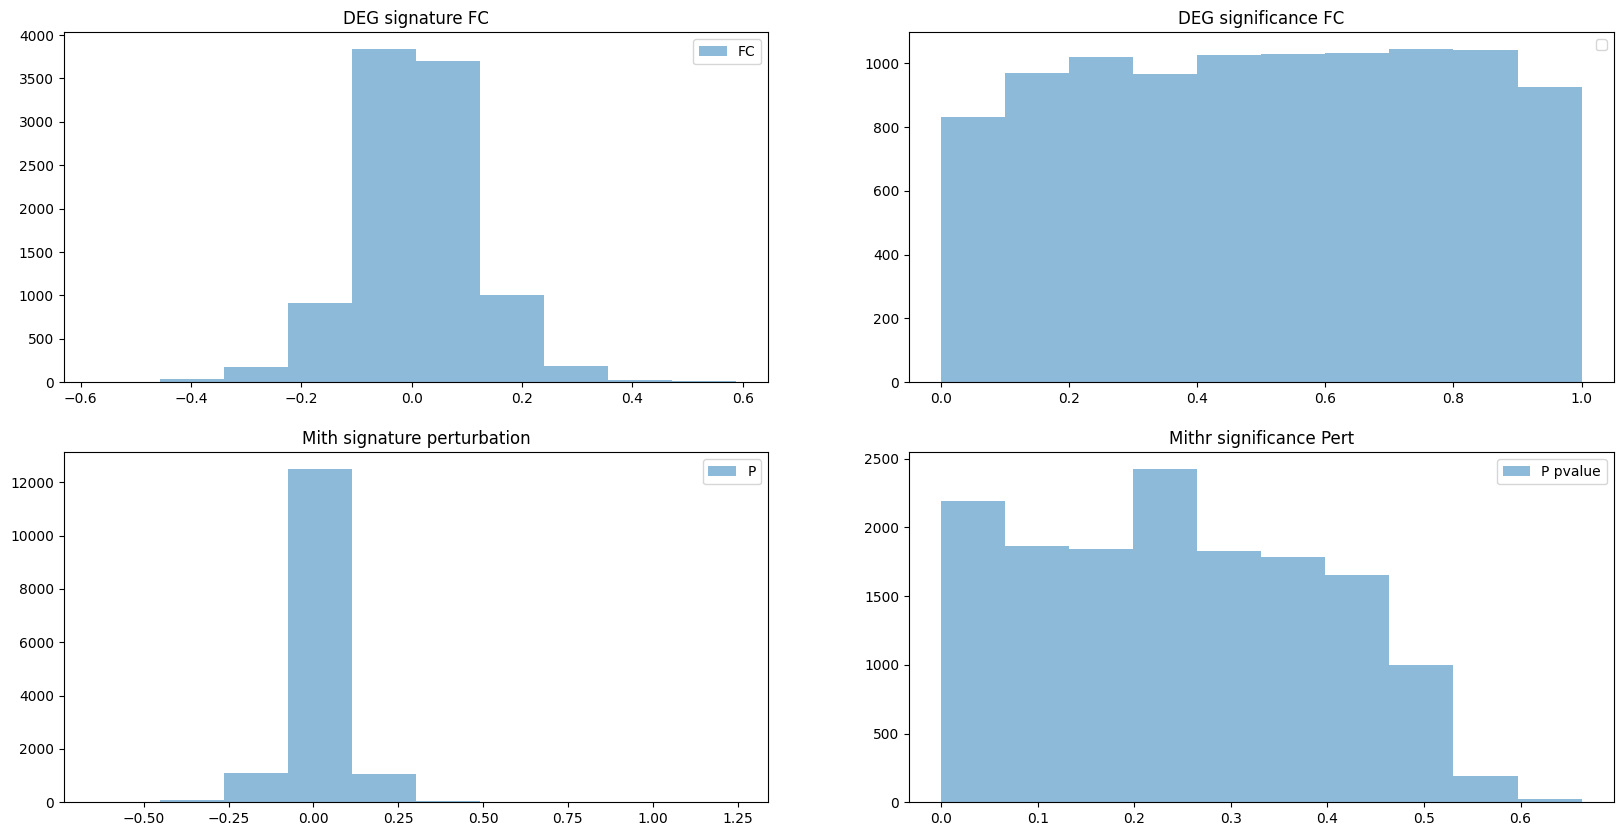

In [104]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ax[0,0].hist(ex_drug_DEG_signature['DE_log2_FC_6h'], label='FC', alpha=0.5)
ax[1,0].hist(ex_drug_mith_signature['Perturbation_6h'], label='P', alpha=0.5)
ax[0,0].set_title('DEG signature FC')
ax[1,0].set_title('Mith signature perturbation')
ax[0,0].legend()
ax[0,1].legend()

ax[0,1].hist(ex_drug_DEG_signature['p.value_6h'], label='FC pvalue', alpha=0.5)
ax[1,1].hist(ex_drug_mith_signature['p.value_6h'], label='P pvalue', alpha=0.5)
ax[0,1].set_title('DEG significance FC')
ax[1,1].set_title('Mithr significance Pert')
ax[1,0].legend()
ax[1,1].legend()



on common genes only:


/tmp/ipykernel_14059/700586472.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,1].legend()


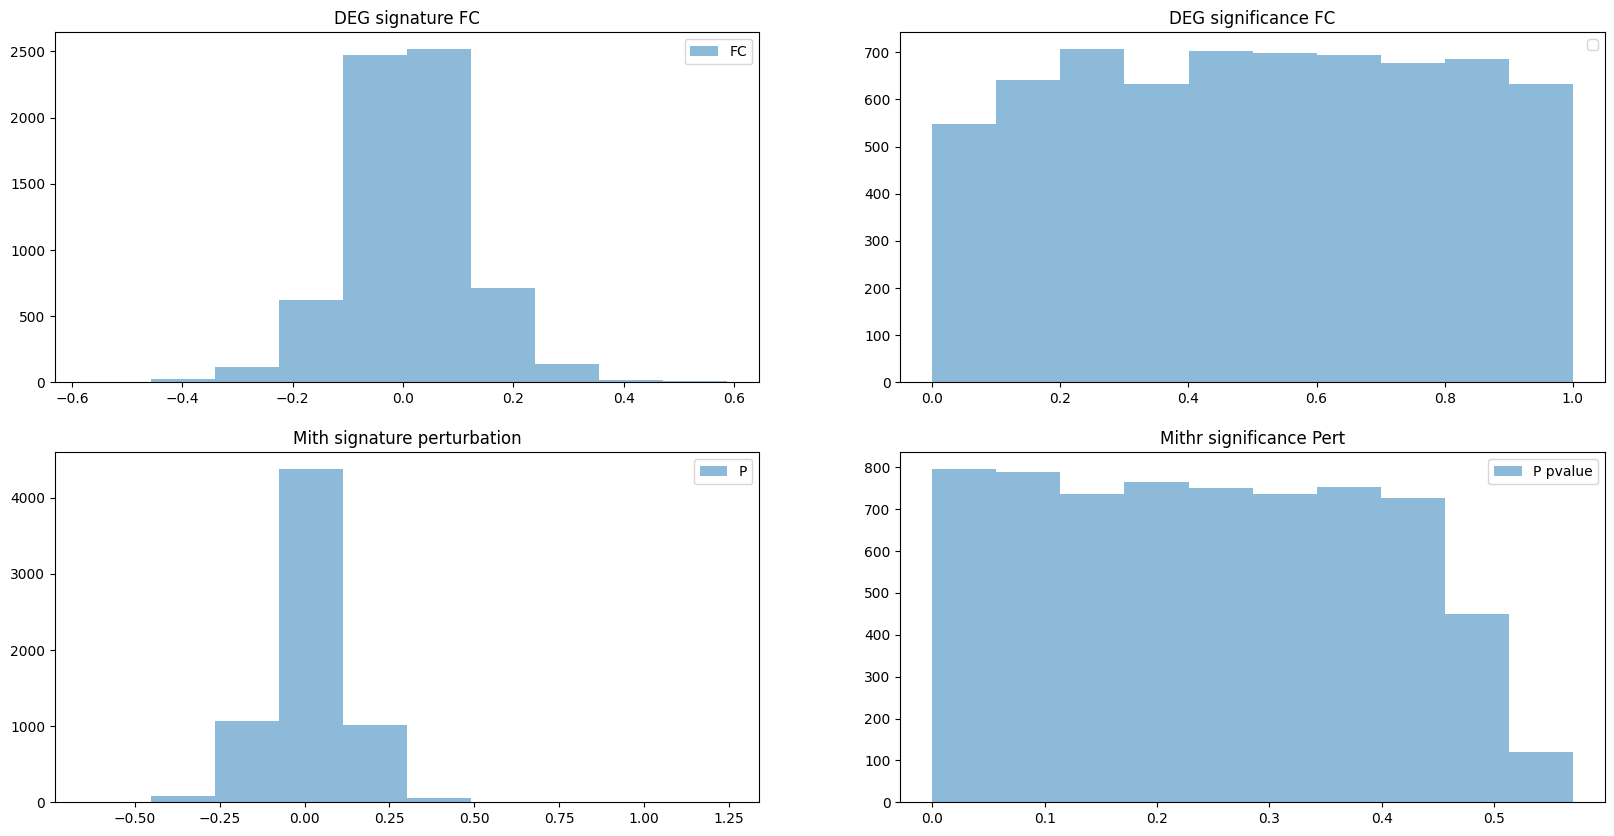

In [106]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ax[0,0].hist(ex_drug_DEG_common['DE_log2_FC_6h'], label='FC', alpha=0.5)
ax[1,0].hist(ex_drug_mith_common['Perturbation_6h'], label='P', alpha=0.5)
ax[0,0].set_title('DEG signature FC')
ax[1,0].set_title('Mith signature perturbation')
ax[0,0].legend()
ax[0,1].legend()

ax[0,1].hist(ex_drug_DEG_common['p.value_6h'], label='FC pvalue', alpha=0.5)
ax[1,1].hist(ex_drug_mith_common['p.value_6h'], label='P pvalue', alpha=0.5)
ax[0,1].set_title('DEG significance FC')
ax[1,1].set_title('Mithr significance Pert')
ax[1,0].legend()
ax[1,1].legend()


In [29]:
# kolomogorov smirnov tra i pvalue mith v deg? in questo caso si vede che DEG è abbastanza casuale perché i pvalue sono distribuiti unifioormnemente, e mit
#nmithril, non ostantenon abbia alcuna info sui pvalue, comunque riporta dei pvalue abbastanza brutti
# mithril capisce che i dati in input non sono buoni?
# mihtril come friltraggio?

Pearson cc: PearsonRResult(statistic=np.float64(-0.003789817785234465), pvalue=np.float64(0.7578045000491397)) 
Spearman cc: SignificanceResult(statistic=np.float64(-0.005615042103707931), pvalue=np.float64(0.6477575354231606))


(PearsonRResult(statistic=np.float64(-0.003789817785234465), pvalue=np.float64(0.7578045000491397)),
 SignificanceResult(statistic=np.float64(-0.005615042103707931), pvalue=np.float64(0.6477575354231606)))

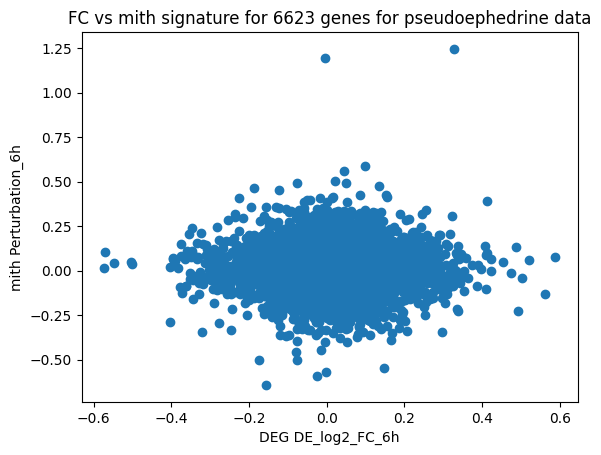

In [107]:
print_correlations(ex_drug_DEG_common,  ex_drug_mith_common,\
                       DEG_col='DE_log2_FC_6h', mith_col='Perturbation_6h',data_name=ex_drug)

In [45]:
ex_drug_mith_signature.columns

Index(['Gene Id', 'Gene Name', 'Perturbation_6h', 'p.value_6h',
       'adj.p.value_6h', 'drug', 't.value_like_statistic_6h',
       'Perturbation_24h', 'p.value_24h', 'adj.p.value_24h',
       't.value_like_statistic_24h', 'Perturbation_6h_24h', 'p.value_6h_24h',
       'adj.p.value_6h_24h', 't.value_like_statistic_6h_24h'],
      dtype='object')

Pearson cc: PearsonRResult(statistic=np.float64(-0.0076175552835904894), pvalue=np.float64(0.5353746786891885)) 
Spearman cc: SignificanceResult(statistic=np.float64(-0.0070539538317160875), pvalue=np.float64(0.5659932738995412))


(PearsonRResult(statistic=np.float64(-0.0076175552835904894), pvalue=np.float64(0.5353746786891885)),
 SignificanceResult(statistic=np.float64(-0.0070539538317160875), pvalue=np.float64(0.5659932738995412)))

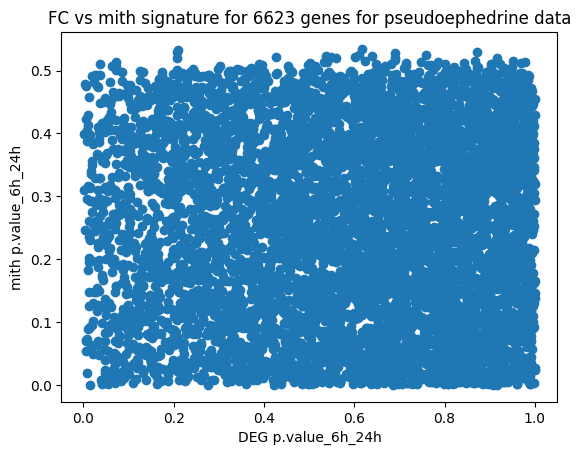

In [108]:
print_correlations(ex_drug_DEG_common,  ex_drug_mith_common,\
                       DEG_col='p.value_6h_24h', mith_col='p.value_6h_24h',data_name=ex_drug)

# <div align="center"><b>Connectivity scores and drug rankings for IPF</b>

## Connectivity scores for DEG data

In [10]:
CS_OUT=CS_DIR+'output'+os.sep+DISEASE+os.sep
deg_cs_filename='12_06_2025_10_28_DEG_connectivity_score.tsv'
DEG_cs_data=pd.read_csv(CS_OUT+deg_cs_filename, sep='\t')
DEG_cs_data.sort_values(by='connectivity_score')

,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
2643,ipf,BRD-K78481586,6h,-1.995172,0.001,-0.017125,1.108640e-01,-0.011758,2.736810e-01,-0.021498
9181,ipf,tetradecylthioacetic-acid,24h,-1.994782,0.002,0.042084,8.872597e-05,0.012759,2.348805e-01,0.044499
9548,ipf,verapamil,6h_24h,-1.994622,0.003,0.068405,1.823245e-10,0.027128,1.154107e-02,0.065866
1102,ipf,BRD-K13046565,24h,-1.994543,0.000,0.022554,3.573888e-02,0.027008,1.191137e-02,0.009963
1722,ipf,BRD-K41668190,6h,-1.992780,0.002,0.022994,3.227939e-02,0.004312,6.881310e-01,0.028362
...,...,...,...,...,...,...,...,...,...,...
5208,ipf,STK-397047,6h,1.996978,0.001,-0.071678,2.367191e-11,-0.051331,1.737834e-06,-0.075124
8240,ipf,ornidazole,6h_24h,1.997065,0.001,-0.052083,1.223029e-06,-0.068111,2.180110e-10,-0.065082
9456,ipf,tyrphostin-AG-126,6h,1.997470,0.000,-0.103505,4.387596e-22,-0.136443,2.682469e-37,-0.103537
7546,ipf,karakoline,24h,1.997770,0.000,-0.059231,3.411834e-08,-0.049385,4.219483e-06,-0.069890


In [15]:
DEG_cs_data_24h=DEG_cs_data[DEG_cs_data.perturbation_time=='24h']
DEG_cs_data_meta=DEG_cs_data[DEG_cs_data.perturbation_time=='6h_24h']

### Cortisone rankings

In [46]:
for pert in pert_times:
    
    print('cortisone in FC data, ', pert,':')
    print(DEG_cs_data[['drug', 'connectivity_score','cs_p_value', 'perturbation_time']][DEG_cs_data.perturbation_time==pert][DEG_cs_data['drug'].str.startswith('cortisone')])

cortisone in FC data,  6h :
                   drug  connectivity_score  cs_p_value perturbation_time
6354          cortisone            1.989993       0.014                6h
6357  cortisone-acetate            1.974708       0.257                6h
cortisone in FC data,  24h :
                   drug  connectivity_score  cs_p_value perturbation_time
6355          cortisone            1.983859       0.067               24h
6358  cortisone-acetate            1.985779       0.050               24h
cortisone in FC data,  6h_24h :
                   drug  connectivity_score  cs_p_value perturbation_time
6356          cortisone            1.986487       0.042            6h_24h
6359  cortisone-acetate            0.002945       0.881            6h_24h


### DEG Drugs ranking

In [27]:
top_ranking_drugs(DEG_cs_data_24h)


76 with connectivity score <= -1.95 and P value<= 1


,disease,drug,connectivity_score,cs_p_value,perturbation_time
9181,ipf,tetradecylthioacetic-acid,-1.994782,0.002,24h
1102,ipf,BRD-K13046565,-1.994543,0.000,24h
9178,ipf,tetrabenazine,-1.990679,0.005,24h
4315,ipf,MW-STK33-3A,-1.990668,0.010,24h
2014,ipf,BRD-K54405293,-1.990275,0.018,24h
...,...,...,...,...,...
133,ipf,AKT-inhibitor-1-2,-1.961987,0.441,24h
2683,ipf,BRD-K79779816,-1.959420,0.434,24h
1294,ipf,BRD-K22215695,-1.959413,0.436,24h
5059,ipf,SKI-II,-1.957671,0.459,24h


In [34]:
top_ranking_drugs(DEG_cs_data_meta, pval=0.01)

2 with connectivity score <= -1.95 and P value<= 0.01


,disease,drug,connectivity_score,cs_p_value,perturbation_time
9548,ipf,verapamil,-1.994622,0.003,6h_24h
2645,ipf,BRD-K78481586,-1.991634,0.008,6h_24h


## Connectivity scores for  Mith data with hsa2023 base network

In [95]:
CS_OUT=CS_DIR+'output'+os.sep+DISEASE+os.sep
mith_2023_cs_filename='11_06_2025_11_56_mith_connectivity_score.tsv'
mith_2023_cs_data=pd.read_csv(CS_OUT+mith_2023_cs_filename, sep='\t')
mith_2023_cs_data_24=mith_2023_cs_data[mith_2023_cs_data.perturbation_time=='24h']
mith_2023_cs_data_meta=mith_2023_cs_data[mith_2023_cs_data.perturbation_time=='6h_24h']


### Cortisone rankings

In [45]:
for pert in pert_times:
    
    print('cortisone in FC data, ', pert,':')
    print(mith_cs_data[['drug', 'connectivity_score','cs_p_value', 'perturbation_time']][mith_2023_cs_data.perturbation_time==pert][mith_2023_cs_data['drug'].str.startswith('cortisone')])

cortisone in FC data,  6h :
                   drug  connectivity_score  cs_p_value perturbation_time
6354          cortisone            1.993654       0.009                6h
6357  cortisone-acetate            1.986325       0.075                6h
cortisone in FC data,  24h :
                   drug  connectivity_score  cs_p_value perturbation_time
6355          cortisone            1.985855       0.093               24h
6358  cortisone-acetate            0.006889       0.705               24h
cortisone in FC data,  6h_24h :
                   drug  connectivity_score  cs_p_value perturbation_time
6356          cortisone            1.996484       0.000            6h_24h
6359  cortisone-acetate            0.001758       0.918            6h_24h


### Mith 2023 Drug rankings all

In [97]:
top_ranking_drugs(mith_2023_cs_data, pval=0.01)

0 with connectivity score <= -1.95 and P value<= 0.01


,disease,drug,connectivity_score,cs_p_value,perturbation_time


In [91]:
top_ranking_drugs(mith_2023_cs_data, pval=1)

45 with connectivity score <= -1.95 and P value<= 1


,disease,drug,connectivity_score,cs_p_value,perturbation_time
3035,ipf,BRD-K95349679,-1.990749,0.021,6h_24h
7983,ipf,moxifloxacin,-1.989039,0.039,6h
5938,ipf,beta-CCP,-1.988319,0.049,24h
4275,ipf,MW-A1-6,-1.987621,0.071,6h
4891,ipf,SAR-245408,-1.986339,0.087,24h
4737,ipf,RAN-14B,-1.985416,0.098,6h
2503,ipf,BRD-K72883421,-1.984786,0.112,24h
2203,ipf,BRD-K61529775,-1.983390,0.141,24h
1855,ipf,BRD-K48016779,-1.982818,0.180,24h
6566,ipf,dibutyrylcyclic-gmp,-1.981055,0.201,6h_24h


### Mith 2023 Drug rankings Metadata

In [53]:
top_ranking_drugs(mith_2023_cs_data_meta, pval=0.01)

0 with connectivity score <= -1.95 and P value<= 0.01


,disease,drug,connectivity_score,cs_p_value,perturbation_time


In [49]:
top_ranking_drugs(mith_2023_cs_data_meta, pval=1)

12 with connectivity score <= -1.95 and P value<= 1


,disease,drug,connectivity_score,cs_p_value,perturbation_time
3035,ipf,BRD-K95349679,-1.990749,0.021,6h_24h
6566,ipf,dibutyrylcyclic-gmp,-1.981055,0.201,6h_24h
2867,ipf,BRD-K88735704,-1.979137,0.273,6h_24h
287,ipf,BAY-59-3074,-1.977511,0.317,6h_24h
7811,ipf,mephenytoin,-1.975433,0.334,6h_24h
7622,ipf,leu-enkephalin,-1.972516,0.413,6h_24h
5357,ipf,UCL-2077,-1.970266,0.440,6h_24h
2504,ipf,BRD-K72883421,-1.969798,0.469,6h_24h
4142,ipf,LY-320135,-1.968432,0.413,6h_24h
8138,ipf,nitrarine,-1.965820,0.467,6h_24h


### Mith 2023 Drug Rankings 24h

In [96]:
top_ranking_drugs(mith_2023_cs_data_24, pval=0.1)

2 with connectivity score <= -1.95 and P value<= 0.1


,disease,drug,connectivity_score,cs_p_value,perturbation_time
5938,ipf,beta-CCP,-1.988319,0.049,24h
4891,ipf,SAR-245408,-1.986339,0.087,24h


In [51]:
top_ranking_drugs(mith_2023_cs_data_24, pval=1)

18 with connectivity score <= -1.95 and P value<= 1


,disease,drug,connectivity_score,cs_p_value,perturbation_time
5938,ipf,beta-CCP,-1.988319,0.049,24h
4891,ipf,SAR-245408,-1.986339,0.087,24h
2503,ipf,BRD-K72883421,-1.984786,0.112,24h
2203,ipf,BRD-K61529775,-1.983390,0.141,24h
1855,ipf,BRD-K48016779,-1.982818,0.180,24h
1783,ipf,BRD-K44878494,-1.979115,0.242,24h
3055,ipf,BRD-K96167523,-1.976765,0.334,24h
3874,ipf,JAS07-010,-1.975784,0.350,24h
622,ipf,BRD-A55565369,-1.975723,0.319,24h
2734,ipf,BRD-K82206012,-1.975512,0.360,24h


## Connectivity scores for  Mith data with hsa2025 base network

In [70]:
CS_OUT=CS_DIR+'output'+os.sep+DISEASE+'_2025'+os.sep
mith_2025_cs_filename='10_06_2025_19_34_mith_connectivity_score.tsv'
mith_2025_cs_data=pd.read_csv(CS_OUT+mith_2025_cs_filename, sep='\t')
mith_2025_cs_data_24=mith_2025_cs_data[mith_2025_cs_data.perturbation_time=='24h']
mith_2025_cs_data_meta=mith_2025_cs_data[mith_2025_cs_data.perturbation_time=='6h_24h']


### Cortisone rankings

In [61]:
for pert in pert_times:
    
    print('cortisone in FC data, ', pert,':')
    print(mith_cs_data[['drug', 'connectivity_score','cs_p_value', 'perturbation_time']][mith_2025_cs_data.perturbation_time==pert][mith_2025_cs_data['drug'].str.startswith('cortisone')])

cortisone in FC data,  6h :
                   drug  connectivity_score  cs_p_value perturbation_time
6357  cortisone-acetate            1.986325       0.075                6h
6360       corynanthine            1.993288       0.004                6h
cortisone in FC data,  24h :
                   drug  connectivity_score  cs_p_value perturbation_time
6358  cortisone-acetate            0.006889       0.705               24h
6361       corynanthine            0.002925       0.861               24h
cortisone in FC data,  6h_24h :
                   drug  connectivity_score  cs_p_value perturbation_time
6359  cortisone-acetate            0.001758       0.918            6h_24h
6362       corynanthine            0.014323       0.531            6h_24h


### Mith 2025 Drug rankings all

In [63]:
top_ranking_drugs(mith_2025_cs_data, pval=0.01)

1 with connectivity score <= -1.95 and P value<= 0.01


,disease,drug,connectivity_score,cs_p_value,perturbation_time
9514,ipf,umbelliferone,-1.992529,0.009,24h


In [84]:
top_ranking_drugs(mith_2025_cs_data)

143 with connectivity score <= -1.95 and P value<= 1


,disease,drug,connectivity_score,cs_p_value,perturbation_time
9514,ipf,umbelliferone,-1.992529,0.009,24h
3038,ipf,BRD-K95349679,-1.991120,0.027,6h_24h
928,ipf,BRD-K05775306,-1.990864,0.024,24h
5362,ipf,UGISS-186,-1.990352,0.022,24h
1204,ipf,BRD-K17203693,-1.989327,0.039,24h
5941,ipf,beta-CCP,-1.988815,0.051,24h
4101,ipf,L-stepholidine,-1.988786,0.043,6h
9515,ipf,umbelliferone,-1.988559,0.050,6h_24h
4278,ipf,MW-A1-6,-1.988054,0.065,6h
1760,ipf,BRD-K42644990,-1.987726,0.051,6h_24h


### Mith 2025 Drug rankings metanalysis

In [71]:
top_ranking_drugs(mith_2025_cs_data_meta, pval=0.01)

0 with connectivity score <= -1.95 and P value<= 0.01


,disease,drug,connectivity_score,cs_p_value,perturbation_time


In [89]:
top_ranking_drugs(mith_2025_cs_data_meta)

46 with connectivity score <= -1.95 and P value<= 1


,disease,drug,connectivity_score,cs_p_value,perturbation_time
3038,ipf,BRD-K95349679,-1.991120,0.027,6h_24h
9515,ipf,umbelliferone,-1.988559,0.050,6h_24h
1760,ipf,BRD-K42644990,-1.987726,0.051,6h_24h
9224,ipf,thioperamide,-1.985933,0.092,6h_24h
5942,ipf,beta-CCP,-1.984972,0.108,6h_24h
9572,ipf,vinburnine,-1.981911,0.173,6h_24h
2870,ipf,BRD-K88735704,-1.979469,0.214,6h_24h
1877,ipf,BRD-K48823327,-1.978375,0.259,6h_24h
7514,ipf,isonicotinohydroxamic-acid,-1.977656,0.256,6h_24h
290,ipf,BAY-59-3074,-1.977656,0.261,6h_24h


In [85]:
top_ranking_drugs(mith_2025_cs_data_24, pval=0.01)

1 with connectivity score <= -1.95 and P value<= 0.01


,disease,drug,connectivity_score,cs_p_value,perturbation_time
9514,ipf,umbelliferone,-1.992529,0.009,24h


In [86]:
top_ranking_drugs(mith_2025_cs_data_24)

58 with connectivity score <= -1.95 and P value<= 1


,disease,drug,connectivity_score,cs_p_value,perturbation_time
9514,ipf,umbelliferone,-1.992529,0.009,24h
928,ipf,BRD-K05775306,-1.990864,0.024,24h
5362,ipf,UGISS-186,-1.990352,0.022,24h
1204,ipf,BRD-K17203693,-1.989327,0.039,24h
5941,ipf,beta-CCP,-1.988815,0.051,24h
8425,ipf,phenylbutazone,-1.987479,0.068,24h
4894,ipf,SAR-245408,-1.986965,0.061,24h
3094,ipf,BRD-K97631938,-1.986454,0.079,24h
6919,ipf,etamivan,-1.986262,0.083,24h
3037,ipf,BRD-K95349679,-1.986253,0.086,24h


### mith 2025 : single drugs

In [88]:
mith_2025_cs_data[mith_2025_cs_data['drug']=="tetradecylthioacetic-acid"]

,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
9183,ipf,tetradecylthioacetic-acid,6h,1.991714,0.015,-0.017783,0.032176,-0.073915,4.862321e-19,-0.027675
9184,ipf,tetradecylthioacetic-acid,24h,-1.984524,0.141,0.014920,0.072297,0.043172,1.965700e-07,0.019649
9185,ipf,tetradecylthioacetic-acid,6h_24h,0.005663,0.771,-0.001369,0.869027,-0.014327,8.437557e-02,-0.004396


## Plot cs distribution: Mith 2025 data

(3223, 10)


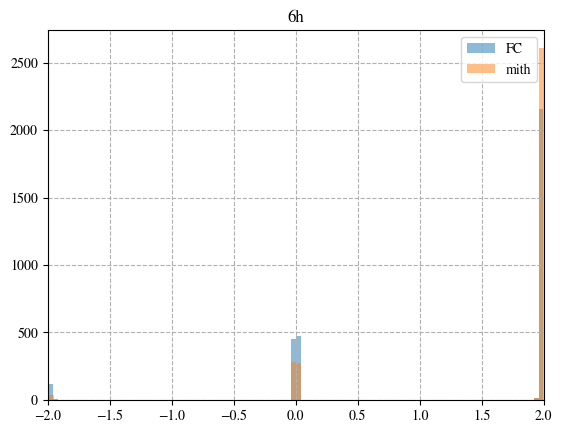

(3223, 10)


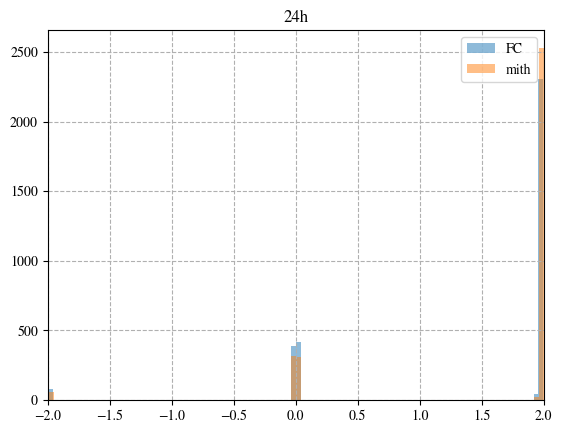

(3223, 10)


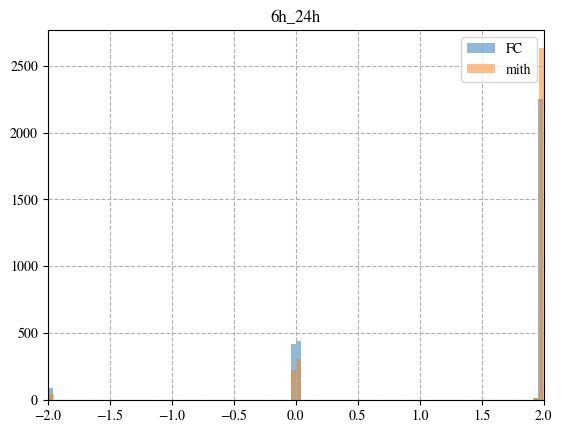

In [90]:
pert_times=['6h','24h','6h_24h'] 
for pert_time in pert_times:
    print( mith_2025_cs_data[mith_2025_cs_data.perturbation_time==pert_time].shape)
    plt.hist(DEG_cs_data[DEG_cs_data.perturbation_time==pert_time]['connectivity_score'], label='FC', alpha=0.5, bins=100)
    plt.hist(mith_2025_cs_data[mith_2025_cs_data.perturbation_time==pert_time]['connectivity_score'], label='mith', alpha=0.5, bins=100)
    
    plt.grid(linestyle='--')
    plt.xlim(-2,2)
    plt.title(pert_time)
    plt.legend()
    plt.show()

Are there values between [0.5,1.5] and [-1.5,-0.5]?

In [82]:
mith_2025_cs_data['connectivity_score'][((mith_2025_cs_data['connectivity_score']<=1.5) & (mith_2025_cs_data['connectivity_score']>=0.5))\
|((mith_2025_cs_data['connectivity_score']>=-1.5) & (mith_2025_cs_data['connectivity_score']<=-0.5))]

Series([], Name: connectivity_score, dtype: float64)

No, there are not.

# Plot cs distribution: FC data 

(3222, 10)


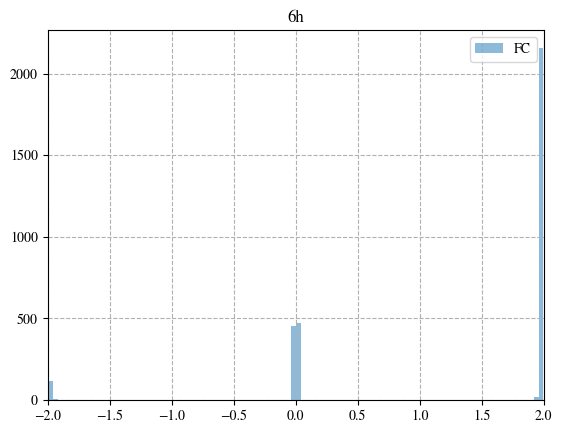

(3222, 10)


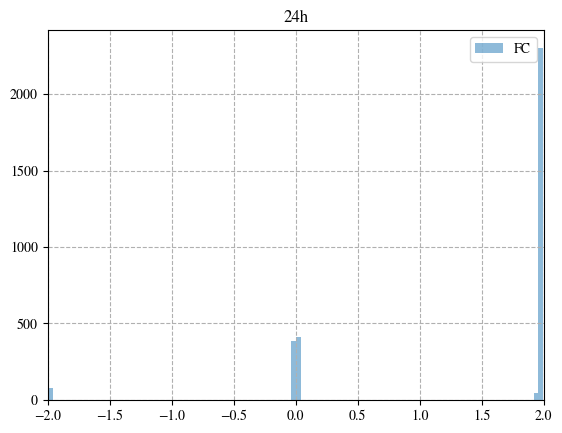

(3222, 10)


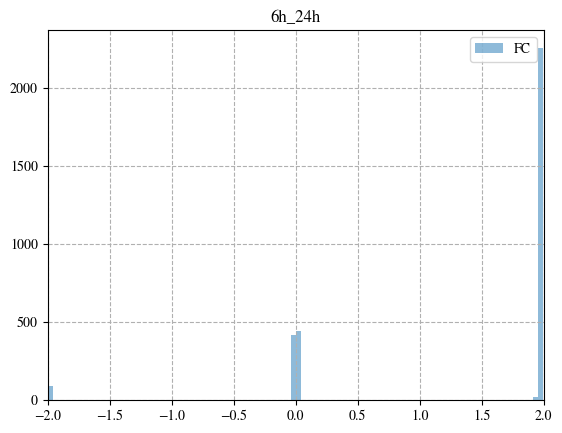

In [93]:
pert_times=['6h','24h','6h_24h'] 
for pert_time in pert_times:
    print( DEG_cs_data[DEG_cs_data.perturbation_time==pert_time].shape)
    plt.hist(DEG_cs_data[DEG_cs_data.perturbation_time==pert_time]['connectivity_score'], label='FC', alpha=0.5, bins=100)
    
    plt.grid(linestyle='--')
    plt.xlim(-2,2)
    plt.title(pert_time)
    plt.legend()
    plt.show()

(3222, 10)
(3223, 10)


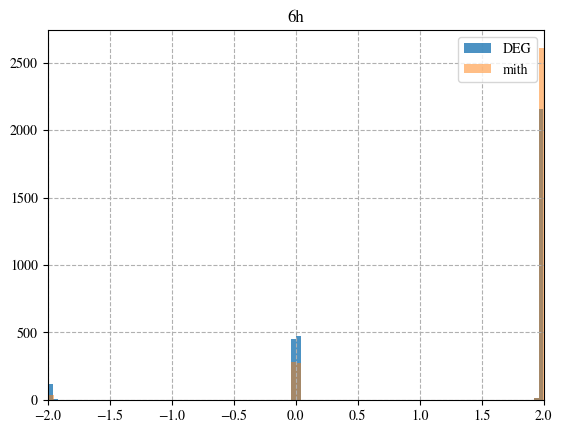

(3222, 10)
(3223, 10)


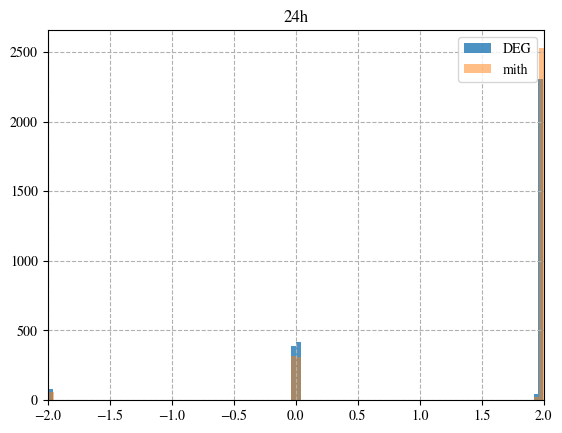

(3222, 10)
(3223, 10)


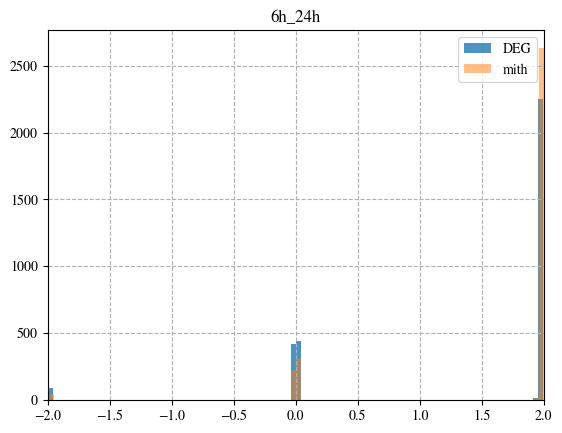

In [126]:
plot_hist(DEG_cs_data, mith_cs_data_2025)

# sort by other values

(3222, 10)


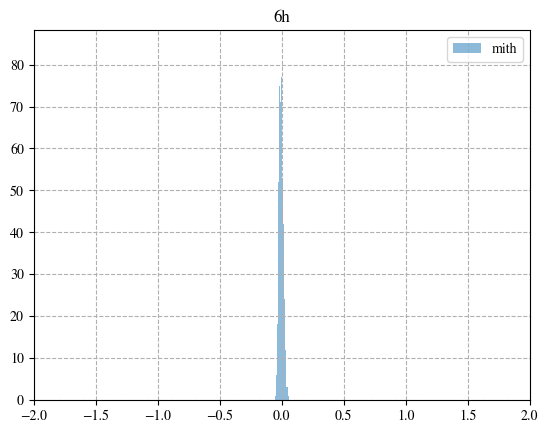

(3222, 10)


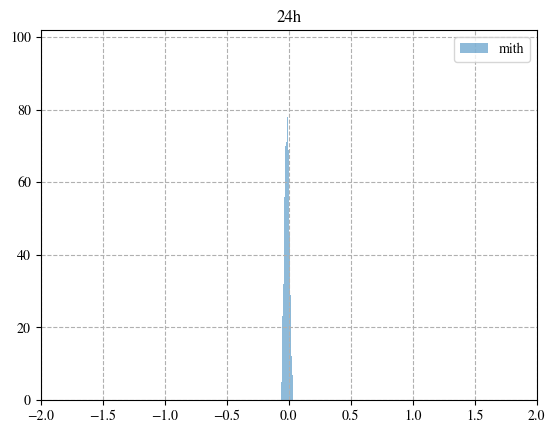

(3222, 10)


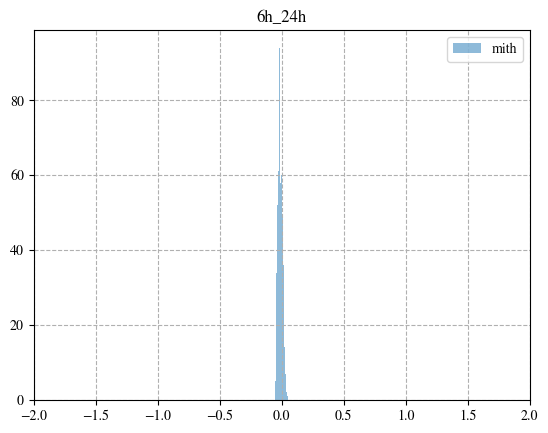

In [47]:
pert_times=['6h','24h','6h_24h'] 
for pert_time in pert_times:
    print( mith_cs_data[mith_cs_data.perturbation_time==pert_time].shape)
    plt.hist(mith_cs_data[mith_cs_data.perturbation_time==pert_time]['pearson'], label='mith', alpha=0.5, bins=100)
    
    plt.grid(linestyle='--')
    plt.xlim(-2,2)
    plt.title(pert_time)
    plt.legend()
    plt.show()

# Only focus on metanalysis
# plot Rankings

# Plot drug rankings of 5 best and worst drugs

In [4]:
mith_cs_data_24=mith_cs_data[mith_cs_data.perturbation_time=='24h']

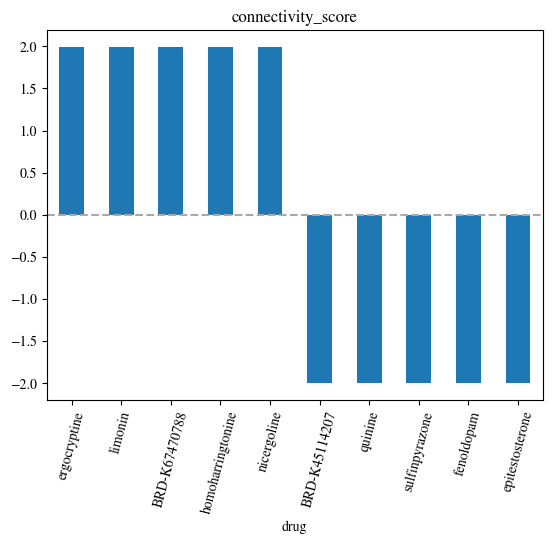

In [30]:
plot_10_most_correlated(mith_cs_data_24.set_index('drug'), 'connectivity_score')

In [12]:
def print_most_and_least_connected(correlations_dataframe, correlation, n=10):
    '''
    correlations_dataframe is a dataframe with as index the label of interest (=drugs)
    '''

    most_correlated=correlations_dataframe[correlations_dataframe[correlation]>0]
    least_correlated=correlations_dataframe[correlations_dataframe[correlation]<0]
   # print('\n'+correlation+' positive\n',most_correlated[correlation].sort_values(ascending=False).head(n))
    print('\n'+correlation+' negative\n',least_correlated[correlation].sort_values(ascending=True).head(n))
    return most_correlated[correlation].sort_values(ascending=False), least_correlated[correlation].sort_values(ascending=True)
# Sort by c
_, top_drugs=print_most_and_least_connected(mith_cs_data[mith_cs_data.perturbation_time=='6h_24h'].set_index('drug'), 'connectivity_score', n=100)


connectivity_score negative
 drug
carbinoxamine   -1.997242
fenoldopam      -1.997212
BML-190         -1.996739
BRD-K03176945   -1.995554
linoleic-acid   -1.995524
                   ...   
tiabendazole    -1.988116
TW-37           -1.988066
BRD-A06664848   -1.988018
BRD-K93760529   -1.988014
BRD-K58547240   -1.987947
Name: connectivity_score, Length: 100, dtype: float64


In [13]:
for ind, i in top_drugs.items():
    print(ind,'\t', i)

carbinoxamine 	 -1.9972419296524195
fenoldopam 	 -1.9972119809621685
BML-190 	 -1.996739391170108
BRD-K03176945 	 -1.995554108966489
linoleic-acid 	 -1.995524160276238
dienestrol 	 -1.9953979820455163
BRD-K66224104 	 -1.9953515704841776
epitestosterone 	 -1.9952840576567403
BRD-K45114207 	 -1.9952541089664888
CS-1657 	 -1.994849032001866
BRD-K22006123 	 -1.994771878342671
GYKI-52466 	 -1.99451146786468
articaine 	 -1.99451146786468
lansoprazole 	 -1.994203852417745
triamterene 	 -1.9941739037274937
piperacetazine 	 -1.9941063909000567
trimipramine 	 -1.994047725496772
BRD-A47714657 	 -1.9940388780726197
MW-STK33-3A 	 -1.993961724413424
pindolol 	 -1.9938266987585496
DCEBIO 	 -1.9930936984884984
BRD-A74134989 	 -1.992881519174429
BRD-K37413063 	 -1.992881519174429
RS-67506 	 -1.9927860830415636
bulleyaconitine-a 	 -1.9927769553072936
T-0070907 	 -1.992725392253456
BRD-K06800040 	 -1.9925744168249824
BRD-K91691979 	 -1.992397468948028
sertaconazole 	 -1.9917923593213385
BRD-K63181962 	 -

In [6]:
mith_cs_data[mith_cs_data['drug'].str.startswith('cortison')]

,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
6354,ipf,cortisone,6h,-0.001341,0.954,-0.011080,1.775348e-01,-0.046670,1.327050e-08,-0.016779
6355,ipf,cortisone,24h,-1.978362,0.279,-0.040457,8.419297e-07,-0.077654,2.952715e-21,-0.059472
6356,ipf,cortisone,6h_24h,-1.969688,0.452,-0.034546,2.607114e-05,-0.078776,7.881377e-22,-0.051116
6357,ipf,cortisone-acetate,6h,-1.985150,0.109,0.003076,7.081795e-01,-0.002026,8.052161e-01,-0.001169
6358,ipf,cortisone-acetate,24h,-0.018755,0.521,-0.023408,4.385466e-03,-0.037489,5.024057e-06,-0.035455
6359,ipf,cortisone-acetate,6h_24h,-1.981572,0.180,-0.016730,4.174603e-02,-0.036845,7.277589e-06,-0.028849


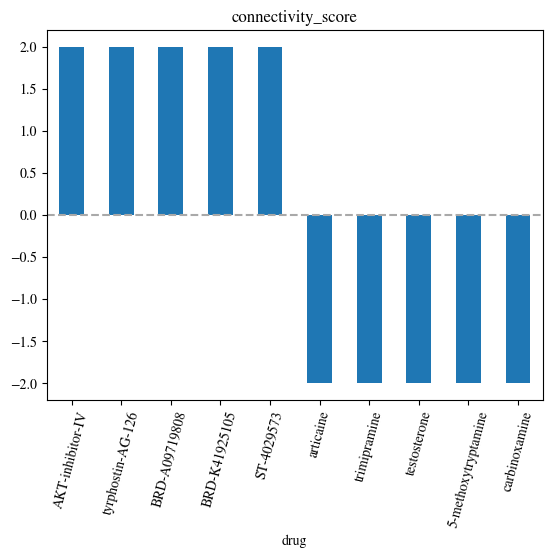

In [55]:
plot_10_most_correlated(mith_cs_data[mith_cs_data.perturbation_time=='6h'].set_index('drug'), 'connectivity_score')

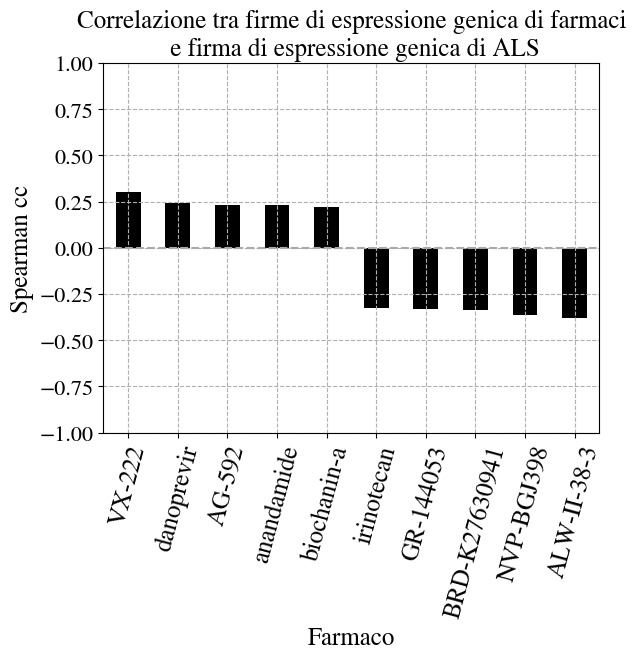

In [107]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

def nice_plot_10_most_correlated(correlations_dataframe, correlation, \
                                 imgname, xlabel, ylabel):
    plt.figure()
    most_and_least_correlated=pd.concat([correlations_dataframe[correlation].sort_values(ascending=False).head(5), correlations_dataframe[correlation].sort_values(ascending=False).tail(5)])
    most_and_least_correlated.plot(kind='bar', color='black')
    plt.xticks(rotation=75, fontsize=18)
    plt.yticks(fontsize=16)
    plt.ylim(-1,1)
    plt.grid(linestyle='--')
    plt.axhline(0, color='darkgrey', linestyle='--')
    plt.title('Correlazione tra firme di espressione genica di farmaci\n e firma di espressione genica di ALS', fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    plt.savefig(IMG_DIR+correlation+'.pdf')
    return
imgname='spearman_cc_esame'
xlabel='Farmaco'
ylabel='Spearman cc'
nice_plot_10_most_correlated(DEG_cs_data_24.set_index('drug'), 'spearman', imgname, xlabel, ylabel)


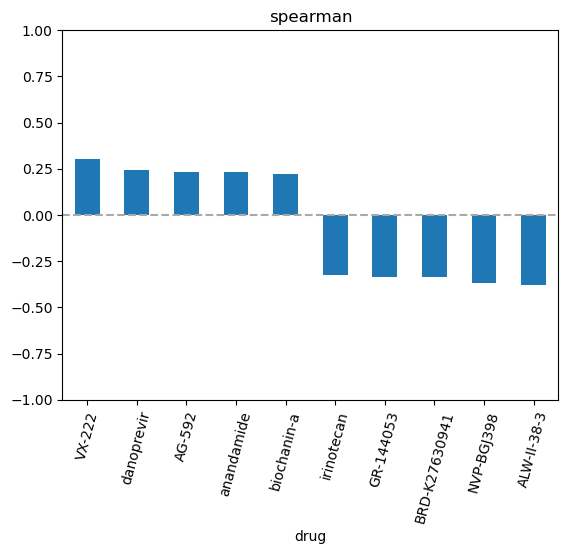

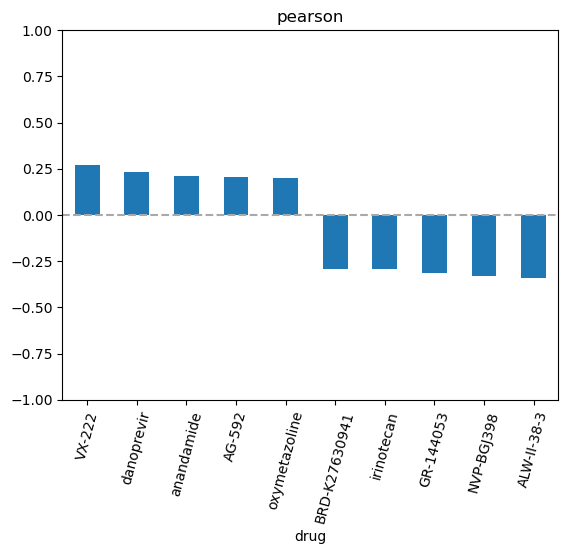

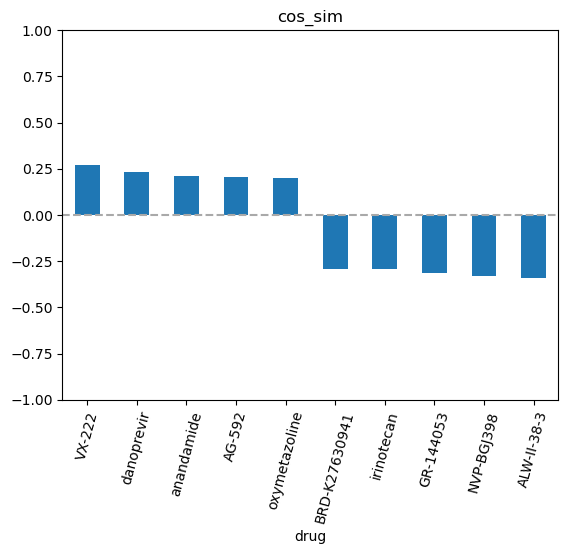

In [77]:
# spearman
plot_10_most_correlated(DEG_cs_data_24.set_index('drug'), 'spearman')
plot_10_most_correlated(DEG_cs_data_24.set_index('drug'), 'pearson')
plot_10_most_correlated(DEG_cs_data_24.set_index('drug'), 'cos_sim')

# mith Plot drug rankings of 5 best and worst drugs

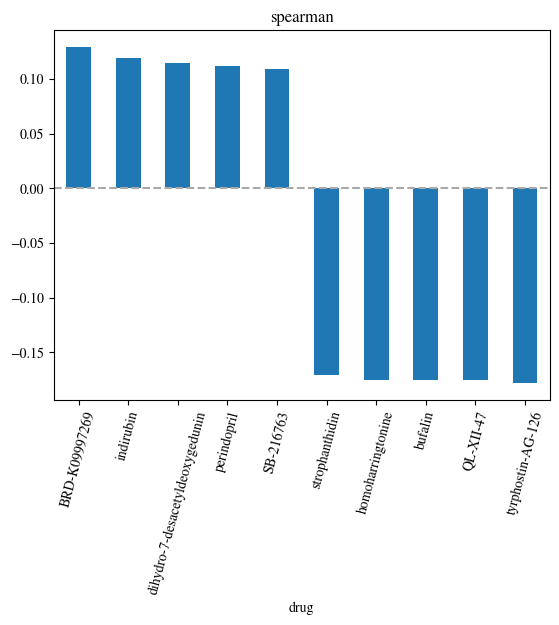

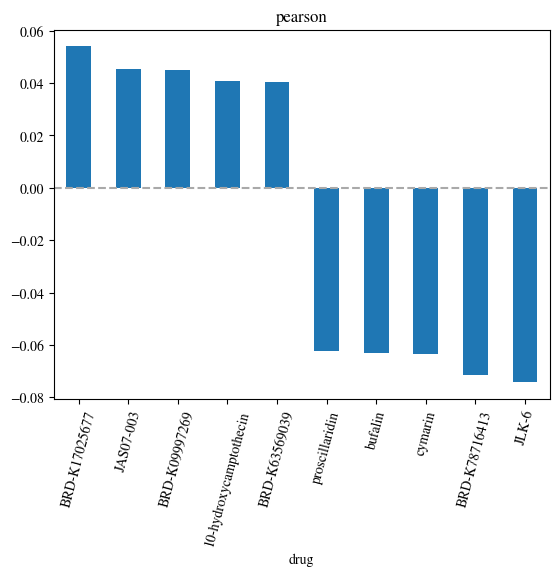

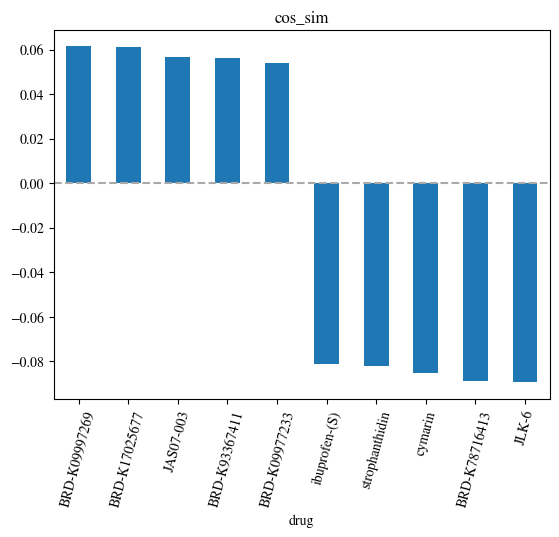

In [31]:
plot_10_most_correlated(mith_cs_data_24.set_index('drug'), 'spearman')
plot_10_most_correlated(mith_cs_data_24.set_index('drug'), 'pearson')
plot_10_most_correlated(mith_cs_data_24.set_index('drug'), 'cos_sim')



In [70]:
mith_cs_data.sort_values(by='connectivity_score').head(10)

,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
3269,als_NYGC,CGP-53353,6h_24h,-1.996397,0.000,-0.160542,4.324709e-86,-0.172600,2.075413e-99,-0.163929
977,als_NYGC,BRD-K07530279,6h_24h,-1.995706,0.004,-0.179420,2.152113e-107,-0.217760,1.756458e-158,-0.182585
5948,als_NYGC,betamethasone-acetate,6h_24h,-1.995385,0.000,-0.124989,1.205530e-52,-0.114935,9.730993e-45,-0.128643
1460,als_NYGC,BRD-K28789065,6h_24h,-1.995331,0.000,-0.143243,9.684236e-69,-0.109777,6.062209e-41,-0.145557
5780,als_NYGC,antimycin-a,6h_24h,-1.995264,0.000,-0.173344,2.894030e-100,-0.154977,2.767803e-80,-0.176270
5063,als_NYGC,SNS-314,6h_24h,-1.995196,0.000,-0.133715,4.655787e-60,-0.116883,3.225341e-46,-0.137370
8228,als_NYGC,olvanil,6h_24h,-1.995129,0.000,-0.162948,1.146775e-88,-0.138281,3.846183e-64,-0.167177
8111,als_NYGC,niguldipine,6h_24h,-1.994980,0.000,-0.110167,3.177561e-41,-0.094219,1.455222e-30,-0.112370
1457,als_NYGC,BRD-K28774715,6h_24h,-1.994905,0.000,0.069101,3.789327e-17,0.067606,1.770520e-16,0.072336
7289,als_NYGC,hexylcaine,6h_24h,-1.994877,0.002,-0.124387,3.746839e-52,-0.102169,1.143783e-35,-0.127379


## SYnonym lists sneza senso di riluzole e edavarone che sono medicine usate in als

In [86]:
list_of_synonyms_of_edaravone=["edaravone",
"89-25-8",
"3-METHYL-1-PHENYL-2-PYRAZOLIN-5-ONE",
"Radicut",
"Norphenazone",
"1-Phenyl-3-methyl-5-pyrazolone",
"Developer Z",
"MCI-186",
"Methylphenylpyrazolone",
"C.I. Developer 1",
"Norantipyrine",
"Phenyl methyl pyrazolone",
"Phenylmethylpyrazolone",
"Radicava",
"5-Methyl-2-phenyl-2,4-dihydro-3H-pyrazol-3-one",
"3-Methyl-1-phenyl-1H-pyrazol-5(4H)-one",
"1-Phenyl-3-methyl-5-oxo-2-pyrazoline",
"CI Developer 1",
"1-Phenyl-3-methylpyrazolone",
"3H-Pyrazol-3-one, 2,4-dihydro-5-methyl-2-phenyl-",
"1-Phenyl-3-methylpyrazolone-5",
"2-Pyrazolin-5-one, 3-methyl-1-phenyl-",
"3-Methyl-1-phenylpyrazol-5-one",
"5-methyl-2-phenyl-4H-pyrazol-3-one",
"Colorex pmp",
"Jarocol pmp",
"3-Methyl-1-phenyl-2-pyrazoline-5-one",
"NCI-C03952",
"5-Pyrazolone, 3-methyl-1-phenyl-",
"2,4-Dihydro-5-methyl-2-phenyl-3H-pyrazol-3-one",
"Edaravone (MCI-186)",
"NSC-2629",
"CCRIS 512",
"edaravona",
"NSC-26139",
"1-Fenyl-3-methyl-2-pyrazolin-5-on",
"CHEBI:31530",
"HSDB 4102",
"UNII-S798V6YJRP",
"EINECS 201-891-0",
"S798V6YJRP",
"MFCD00003138",
"BRN 0609575",
"DTXSID9021130",
"AI3-03557",
"3-methyl-1-phenyl-4,5-dihydro-1H-pyrazol-5-one",
"MLS000069602",
"3-METHYL-1-PHENYL-2-PYRAZOLIN-5-ONE (MCI-186)",
"DTXCID201130",
"EC 201-891-0",
"1-Phenyl-3-methyl-2-pyrazolin-5-one",
"NCGC00164015-01",
"SMR000059020",
"EDARAVONE (MART.)",
"EDARAVONE [MART.]",
"Edaravone [INN]",
"Monopyrazolone",
"WLN: T5NMV DHJ BR& E1",
"CAS-89-25-8",
"Radicut (TN)",
"PHENAZONE IMPURITY A (EP IMPURITY)",
"PHENAZONE IMPURITY A [EP IMPURITY]",
"3H-Pyrazol-3-one,4-dihydro-5-methyl-2-phenyl-",
"SR-01000000135",
"1-Fenyl-3-methyl-2-pyrazolin-5-on [Czech]",
"edaravonum",
"3-?Methyl-?1-?phenyl-?2-?pyrazolin-?5-?one(Edaravone)",
"MCI186",
"(Edaravone)",
"1 Phenyl 3 methyl 5 pyrazolone",
"Radicava (TN)",
"(MCI-186)",
"Edaravone (Standard)",
"3 Methyl 1 phenyl 2 pyrazolin 5 one",
"RADICAVA ORS",
"CDS1_000986",
"Spectrum_000267",
"Tocris-0786",
"EDARAVONE [JAN]",
"MCI-186; Edaravone",
"Edaravone [USAN:INN]",
"EDARAVONE [HSDB]",
"EDARAVONE [USAN]",
"Maybridge1_005738",
"Opera_ID_1057",
"Spectrum2_001574",
"Spectrum3_000971",
"Spectrum4_001091",
"Spectrum5_001217",
"NORPHENAZONE [MI]",
"M0687",
"EDARAVONE [WHO-DD]",
"N-DESMETHYLANTIPYRINE",
"SCHEMBL4704",
"BSPBio_001235",
"BSPBio_002601",
"KBioGR_000575",
"KBioGR_001502",
"KBioSS_000575",
"KBioSS_000747",
"AE-641/00371017",
"MLS001146878",
"MLS002415675",
"MLS006011753",
"DivK1c_001018",
"DivK1c_002026",
"SPECTRUM1503635",
"SPBio_001508",
"CHEMBL290916",
"1-pheny-3-methyl-5-pyrazolone",
"Edaravone (USAN/JP17/INN)",
"EDARAVONE [ORANGE BOOK]",
"BCBcMAP01_000127",
"GTPL11994",
"HMS503K17",
"HMS557M18",
"HY-B0099R",
"KBio1_001018",
"KBio2_000575",
"KBio2_000747",
"KBio2_003143",
"KBio2_003315",
"KBio2_005711",
"KBio2_005883",
"KBio3_001029",
"KBio3_001030",
"KBio3_001821",
"N07XX14",
"NSC2629",
"NINDS_001018",
"5-Methyl-2-phenyl-2,4-dihydro-3H-pyrazol-3-one (Edaravone)",
"BCPP000246",
"Bio1_000438",
"Bio1_000927",
"Bio1_001416",
"Bio2_000448",
"Bio2_000928",
"HMS1362M17",
"HMS1792M17",
"HMS1990M17",
"HMS2234M19",
"HMS3266F04",
"HMS3403M17",
"HMS3411L05",
"HMS3654L15",
"HMS3675L05",
"HMS3884A11",
"Pharmakon1600-01503635",
"BCP26336",
"HY-B0099",
"NSC26139",
"Tox21_112077",
"Tox21_201747",
"Tox21_302819",
"BDBM50200541",
"CCG-39352",
"NSC758622",
"s1326",
"STK201315",
"1-Phenyl-3-methyl-2-pyrazolin-5-on",
"AKOS000313817",
"Tox21_112077_1",
"AC-4745",
"BCP9000635",
"CS-1832",
"DB12243",
"NSC-758622",
"SB19128",
"IDI1_001018",
"IDI1_002203",
"NCGC00018218-01",
"NCGC00018218-02",
"NCGC00018218-03",
"NCGC00018218-04",
"NCGC00018218-05",
"NCGC00018218-06",
"NCGC00018218-07",
"NCGC00018218-08",
"NCGC00018218-10",
"NCGC00018218-17",
"NCGC00022665-02",
"NCGC00022665-04",
"NCGC00022665-05",
"NCGC00022665-06",
"NCGC00256515-01",
"NCGC00259296-01",
"SBI-0051836.P002",
"1ST000657",
"DB-002517",
"NS00002708",
"SW148216-2",
"5-methyl-2-phenyl-2,4-dihydro-3-pyrazolone",
"EN300-16234",
"3-Methyl-1-phenyl-2-pyrazoline-5-one, 99%",
"3-METHYL-1-PHENYL-2H-PYRAZOLIN-5-ONE",
"4E-901",
"5-methyl-2-phenyl-2,4-dihydro-pyrazol-3-one",
"D01552",
"D86209",
"1-PHENYL-3-METHYL-DELTA3-PYRAZOL-5-ONE",
"3-?Methyl-?1-?phenyl-?2-?pyrazolin-?5-?one",
"3-PYRAZOLIN-5-ONE, 3-METHYL-1-PHENYL-",
"AB00375776_14",
"AB00375776_15",
"2 4-Dihydro-5-methyl-2-phenyl-3H-pyrazol-3-one",
"2,4-dihydro-2-phenyl-5-methyl-3H-pyrazol-3-one",
"Q335099",
"SR-01000000135-2",
"SR-01000000135-3",
"SR-01000000135-5",
"5-Methyl-2-phenyl-2,4-dihydro-3H-pyrazol-3-one #",
"BRD-K35458079-001-04-2",
"BRD-K35458079-001-12-5",
"BRD-K35458079-001-23-2",
"BRD-K35458079-001-27-3",
"BRD-K35458079-001-28-1",
"BRD-K35458079-001-29-9",
"BRD-K35458079-001-31-5",
"BRD-K35458079-001-33-1",
"Z50145861",
"F0391-0021",
"3-Methyl-1-phenyl-2-pyrazoline-5-one, SAJ special grade",
"3-Methyl-1-phenyl-2-pyrazoline-5-one, purum, >=98.0% (NT)",
"Phenazone impurity A, European Pharmacopoeia (EP) Reference Standard",
"InChI=1/C10H10N2O/c1-8-7-10(13)12(11-8)9-5-3-2-4-6-9/h2-6H,7H2,1H"]
list_of_synonyms_of_riluzole=["riluzole",
"1744-22-5",
"Rilutek",
"2-Amino-6-(trifluoromethoxy)benzothiazole",
"6-(trifluoromethoxy)benzo[d]thiazol-2-amine",
"6-(trifluoromethoxy)-1,3-benzothiazol-2-amine",
"Riluzol",
"RP-54274",
"Riluzolum",
"2-amino-6-trifluoromethoxybenzothiazole",
"2-Benzothiazolamine, 6-(trifluoromethoxy)-",
"2-amino-6-(trifluoromethoxy)benzo[d]thiazole",
"Tiglutik",
"C8H5F3N2OS",
"PK-26124",
"RP 54274",
"Riluzol [INN-Spanish]",
"Riluzolum [INN-Latin]",
"2-Benzothiazolamine,6-(trifluoromethoxy)-",
"Amino-2 trifluoromethoxy-6 benzothiazole",
"UNII-7LJ087RS6F",
"NSC-753433",
"NSC-759823",
"EXSERVAN",
"7LJ087RS6F",
"MLS000069369",
"6-(trifluoromethoxy)-2-benzothiazolamine",
"6-Trifluoromethoxy-benzothiazol-2-ylamine",
"2-Amino-6-(trifluoromethoxy)-benzothiazole",
"BHV-0223",
"CHEMBL744",
"BENZOTHIAZOLE, 2-AMINO-6-TRIFLUOROMETHOXY-",
"SMR000058231",
"CHEBI:8863",
"DTXSID3045192",
"Riluzole [USAN:USP:INN:BAN]",
"Tiglutik (thickened oral suspension)",
"MFCD00210213",
"NSC 753433",
"NSC 759823",
"NCGC00015882-09",
"Riluzol (INN-Spanish)",
"Riluzolum (INN-Latin)",
"RILUZOLE (MART.)",
"RILUZOLE [MART.]",
"RILUZOLE (USP-RS)",
"RILUZOLE [USP-RS]",
"RILUZOLE (USP IMPURITY)",
"RILUZOLE [USP IMPURITY]",
"DTXCID1025192",
"RILUZOLE (USP MONOGRAPH)",
"RILUZOLE [USP MONOGRAPH]",
"Riluzole (USAN:USP:INN:BAN)",
"Rilutek (TN)",
"CAS-1744-22-5",
"Amino-2 trifluoromethoxy-6 benzothiazole [French]",
"Riluzole, solid",
"Riluzole?",
"BF-37",
"2-amino-6-(trifluoromethoxy)-1,3-benzothiazole",
"ALBB-006046",
"Riluzole (Rilutek)",
"Prestwick-03A08",
"Riluzole (Standard)",
"2 Amino 6 trifluoromethoxybenzothiazole",
"PK26124",
"TIGLUTIK KIT",
"Tocris-0768",
"Opera_ID_548",
"RILUZOLE [USAN]",
"Lopac-R-116",
"RILUZOLE [INN]",
"RILUZOLE [JAN]",
"RILUZOLE [MI]",
"Prestwick0_000167",
"Prestwick1_000167",
"Prestwick2_000167",
"Prestwick3_000167",
"Spectrum2_000550",
"Biomol-NT_000245",
"RILUZOLE [WHO-DD]",
"cid_5070",
"Riluzole (JAN/USP/INN)",
"RILUZOLE [EMA EPAR]",
"Lopac0_001064",
"SCHEMBL78905",
"BSPBio_000033",
"BIDD:GT0055",
"SPBio_000599",
"SPBio_001954",
"RILUZOLE [ORANGE BOOK]",
"BPBio1_000037",
"BPBio1_000837",
"GTPL2326",
"BDBM30705",
"HY-B0211R",
"N07XX02",
"Bio1_000416",
"Bio1_000905",
"Bio1_001394",
"HMS1773G08",
"HMS2089O19",
"HMS2094G07",
"HMS2233E14",
"HMS3263E10",
"HMS3371A09",
"HMS3657E13",
"Pharmakon1600-01505348",
"BCP02142",
"HY-B0211",
"Riluzole - CAS 1744-22-5",
"Tox21_110252",
"Tox21_501064",
"AC-730",
"BBL013272",
"CCG-39528",
"HB6093",
"NSC753433",
"NSC759823",
"s1614",
"STK503686",
"AKOS000265071",
"Tox21_110252_1",
"DB00740",
"KS-5231",
"LP01064",
"SDCCGSBI-0051034.P003",
"2-amino-6-trifluoromethoxy-benzothiazole",
"6-(trifluoromethoxy)benzothiazol-2-amine",
"6-trifluoromethoxy-2-amino-benzothiazole",
"NCGC00015882-01",
"NCGC00015882-02",
"NCGC00015882-03",
"NCGC00015882-04",
"NCGC00015882-05",
"NCGC00015882-06",
"NCGC00015882-07",
"NCGC00015882-08",
"NCGC00015882-10",
"NCGC00015882-11",
"NCGC00015882-12",
"NCGC00015882-13",
"NCGC00015882-15",
"NCGC00015882-28",
"NCGC00023141-02",
"NCGC00023141-04",
"NCGC00023141-05",
"NCGC00023141-06",
"NCGC00261749-01",
"6-(trifluoromethoxy)-2-aminobenzothiazole",
"6-trifluoromethoxybenzo[d]thiazol-2-amine",
"BR164340",
"SBI-0051034.P002",
"2-Amino-6-(Trifluoromethoxy) Benzothiazole",
"6-(Trifluoromethoxy)-2-amino-benzothiazole",
"DB-030335",
"A2423",
"EU-0101064",
"NS00005892",
"R1174",
"SW196805-4",
"EN300-23782",
"6-trifluoromethoxy-1,3-benzothiazol-2-ylamine",
"A13951",
"C07937",
"D00775",
"VU0239571-11",
"Q415744",
"SR-01000002997-3",
"BRD-K21283037-001-02-5",
"BRD-K21283037-001-20-7",
"BRD-K21283037-001-21-5",
"BRD-K21283037-003-03-9",
"BRD-K21283037-003-06-2",
"BRD-K21283037-003-11-2",
"F3282-0020",
"Z164707762",
"Riluzole, 6-(Trifluoromethoxy)-1,3-benzothiazol-2-amine",
"Riluzole, United States Pharmacopeia (USP) Reference Standard",
"2-Amino-6-(trifluoromethoxy)-1,3-benzothiazole;2-AMINO-6-(TRIFLUOROMETHOXY)BENZOTHIAZOLE",
"6-Trifluoromethoxy-2-aminobenzothiazole; 6-(Trifluoromethoxy)-1,3-benzothiazol-2-amine"]

In [87]:
for x in list_of_synonyms_of_riluzole:
    if x in  mith_cs_data.drug:
        print(x)

non c'è

In [141]:
def print_10_most_and_least_significantly_corelated(correlations_dataframe, correlation, p_val_correlation, n=10):
    '''
    correlations_dataframe is a dataframe with as index the label of interest (=drugs)
    '''

    #still full data
    most_correlated=correlations_dataframe[correlations_dataframe[correlation]>0]
    least_correlated=correlations_dataframe[correlations_dataframe[correlation]<0]


    print('\n'+correlation+' positive\n',most_correlated[p_val_correlation].sort_values(ascending=True).head(n))
    print('\n'+correlation+' negative\n',least_correlated[p_val_correlation].sort_values(ascending=True).head(n))
    return

In [55]:
print_10_most_and_least_significantly_corelated(mith_cs_data.set_index('drug'), 'spearman', 'spearman_p_value', 20)
print_10_most_and_least_significantly_corelated(mith_cs_data.set_index('drug'), 'pearson','pearson_p_value', 20)



spearman positive
 drug
TG-100115             3.591346e-223
ZM-39923              3.773550e-175
probenecid            1.010802e-174
rhapontin             4.475021e-147
SA-3676               1.094402e-142
PT-630                5.079169e-142
hydrocotarnine        4.684960e-134
PT-630                3.588227e-128
oxymetazoline         6.922203e-128
BAY-K-8644-(S)-(-)    4.125719e-126
triacsin-c            4.254452e-122
triacsin-c            4.254452e-122
BRD-K33164466         1.873198e-120
iloperidone           2.656246e-119
MDL-73005EF           1.876366e-113
etacrynic-acid        4.881913e-112
fursultiamine         2.917551e-111
safrolglycol          5.694766e-111
VX-222                5.737752e-111
gabazine              5.042778e-109
Name: spearman_p_value, dtype: float64

spearman negative
 drug
NVP-BGJ398           2.634603e-271
ALW-II-38-3          5.801126e-261
erythrosine          4.930657e-231
erythrosine          3.326570e-230
brivanib             3.331662e-223
DMAB-anabaseine 

In [56]:
print_10_most_and_least_significantly_corelated(mith_cs_data.set_index('drug'), 'connectivity_score', 'cs_p_value')



connectivity_score positive
 drug
BRD-K98004941    0.000
haloperidol      0.000
BRD-K13665914    0.000
BRD-K78716413    0.001
MBCQ             0.001
imiquimod        0.001
naphazoline      0.002
BRD-K72676786    0.002
losartan         0.002
catechin         0.002
Name: cs_p_value, dtype: float64

connectivity_score negative
 drug
CGP-53353                0.000
L-655240                 0.000
BRD-K33392208            0.001
BRD-K10609180            0.001
betamethasone-acetate    0.001
FPL-64176                0.001
BRD-K58784778            0.001
thapsigargin             0.001
GBR-12783                0.001
trapidil                 0.002
Name: cs_p_value, dtype: float64


In [64]:
print_10_most_and_least_significantly_corelated(mith_cs_data[mith_cs_data.perturbation_time=='6h'].set_index('drug'), 'connectivity_score', 'cs_p_value', 10)

print_10_most_and_least_significantly_corelated(mith_cs_data_24.set_index('drug'), 'connectivity_score', 'cs_p_value', 10)

print_10_most_and_least_significantly_corelated(mith_cs_data[mith_cs_data.perturbation_time=='6h_24h'].set_index('drug'), 'connectivity_score', 'cs_p_value', 10)



connectivity_score positive
 drug
MBCQ                         0.001
imiquimod                    0.001
phorbol-myristate-acetate    0.002
BRD-K72676786                0.002
naphazoline                  0.002
prostaglandin-a1             0.003
BRD-K60571253                0.003
BRD-K64970062                0.004
BRD-K83194053                0.004
BRD-K39522184                0.004
Name: cs_p_value, dtype: float64

connectivity_score negative
 drug
BRD-K10609180       0.001
7-hydroxy-PIPAT     0.002
bisbenzimide        0.002
APHA-compound-8     0.002
BRD-K61359235       0.003
quetiapine          0.003
BRD-A73847809       0.003
dibenzoylmethane    0.003
KI-8751             0.003
plinabulin          0.004
Name: cs_p_value, dtype: float64

connectivity_score positive
 drug
BRD-K78716413      0.001
catechin           0.002
ABT-751            0.003
VUF-5681           0.003
fenobam            0.005
BMS-191011         0.005
endecaphyllin-x    0.006
doramapimod        0.006
CMPD-1             

# DEG

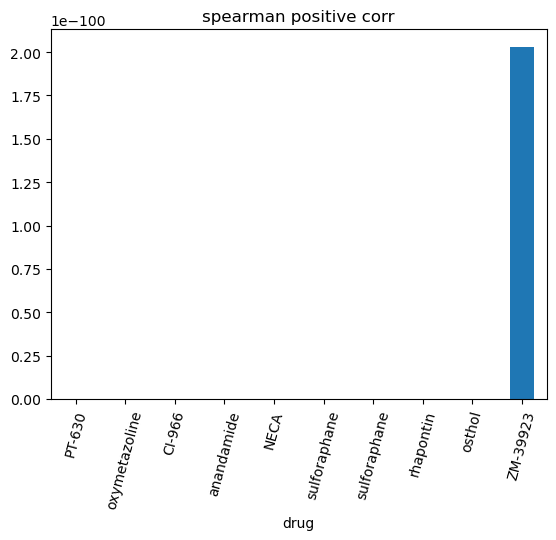

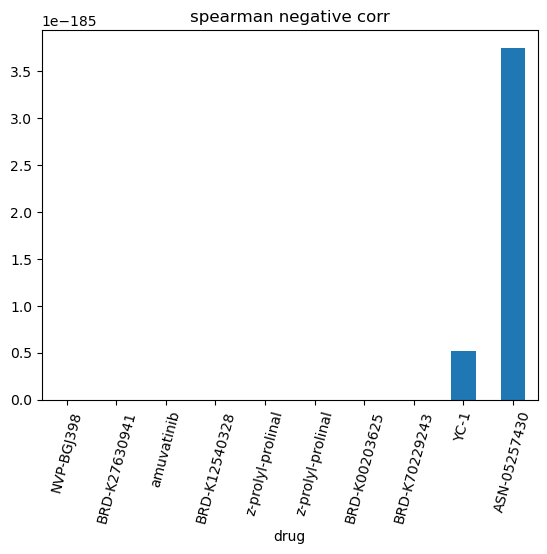

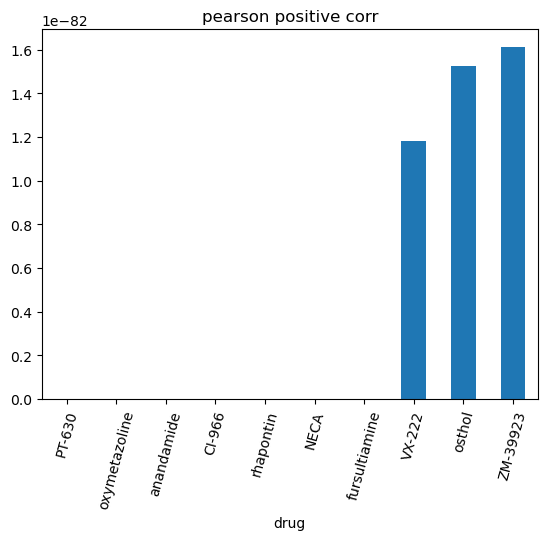

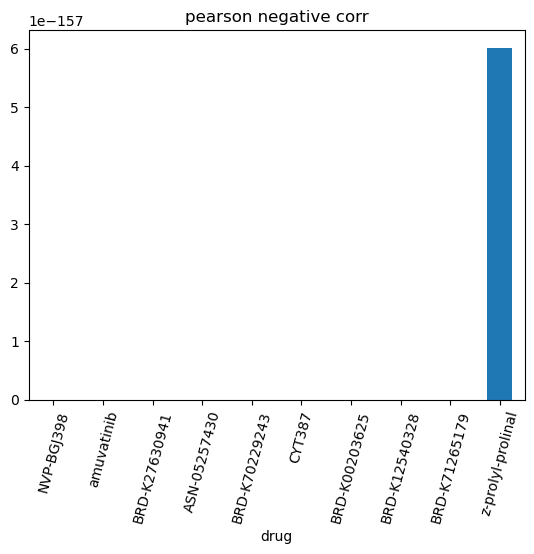

In [59]:
plot_10_most_and_least_significantly_corelated(DEG_cs_data.set_index('drug'), 'spearman', 'spearman_p_value')
plot_10_most_and_least_significantly_corelated(DEG_cs_data.set_index('drug'), 'pearson','pearson_p_value')


In [61]:
# for Cscore
print_10_most_and_least_significantly_corelated(DEG_cs_data.set_index('drug'), 'connectivity_score','cs_p_value', 20)


connectivity_score positive
 drug
BRD-K07790824    0.000
UNC-0321         0.000
ticlopidine      0.000
BRD-K06623064    0.000
ticlopidine      0.000
ZM-323881        0.000
tribenoside      0.000
dasatinib        0.000
cirazoline       0.000
PP-2             0.000
PCI-24781        0.001
tribenoside      0.001
BRD-K64024097    0.001
pirlindole       0.001
BRD-K10057859    0.002
neratinib        0.002
AZD-1480         0.002
SJB-shh-31       0.002
BRD-K64024097    0.002
BRD-K52831896    0.002
Name: cs_p_value, dtype: float64

connectivity_score negative
 drug
doramapimod       0.000
flutamide         0.000
met-leu-phe       0.000
solifenacin       0.000
ICI-204448        0.000
hydrastinine      0.000
BRD-K35568648     0.001
dephostatin       0.001
nateglinide       0.001
austricine        0.001
irilin-a          0.002
BRD-K28366444     0.002
cytochalasin-d    0.002
BRD-K55896799     0.003
paroxetine        0.003
reserpic-acid     0.003
L-670596          0.003
AC-55649          0.003
NCH-5

In [62]:
print_10_most_and_least_significantly_corelated(DEG_cs_data[DEG_cs_data.perturbation_time=='6h'].set_index('drug'), 'connectivity_score','cs_p_value', 20)

print_10_most_and_least_significantly_corelated(DEG_cs_data[DEG_cs_data.perturbation_time=='24h'].set_index('drug'), 'connectivity_score','cs_p_value', 20)

print_10_most_and_least_significantly_corelated(DEG_cs_data[DEG_cs_data.perturbation_time=='6h_24h'].set_index('drug'), 'connectivity_score','cs_p_value', 20)


connectivity_score positive
 drug
BRD-K07790824    0.000
ticlopidine      0.000
ticlopidine      0.000
ZM-323881        0.000
PP-2             0.000
BRD-K06623064    0.000
pirlindole       0.001
PCI-24781        0.001
SJB-shh-31       0.002
neratinib        0.002
BRD-K10057859    0.002
BRD-K52831896    0.002
AZD-7762         0.004
BRD-K29345712    0.004
BRD-K51557114    0.004
foretinib        0.005
fenbendazole     0.006
clopidogrel      0.006
AMG-9810         0.006
isoxicam         0.006
Name: cs_p_value, dtype: float64

connectivity_score negative
 drug
cytochalasin-d    0.002
TUL-XIX029        0.005
BRD-K08307026     0.007
risperidone       0.008
BRL-52537         0.010
O-2050            0.011
vesamicol         0.015
NBI-27914         0.016
mebeverine        0.017
BRD-K16057611     0.017
cardiogenol-c     0.018
vesamicol         0.019
fexaramine        0.019
BRD-K32862555     0.020
BRD-A24054354     0.020
TW-37             0.021
BRD-K33676730     0.023
BNTX              0.024
neuro

# Correlation tra mith e DEG cs?
sempre usando solo 6h 24hDEG_cs_data

In [133]:
stats.pearsonr(DEG_cs_data.sort_values(by='drug')['connectivity_score'], mith_cs_data.sort_values(by='drug')['connectivity_score'])

PearsonRResult(statistic=np.float64(0.08090929669149156), pvalue=np.float64(1.6297010996879943e-15))

In [15]:
stats.spearmanr(DEG_cs_data.sort_values(by='drug')['connectivity_score'], mith_cs_data.sort_values(by='drug')['connectivity_score'])

SignificanceResult(statistic=0.013842960848149063, pvalue=0.16064884514981276)

# Random sampling of REG distribution:

In [123]:
from scipy.stats import ks_2samp

In [124]:
from connectivity_score import montecarlo_connectivity, calculate_RGES

r=9892#1000#14812#

# Length of disease up regulated signature:
# set to sup=int(r/2) to sample drug spectrum
s_up=int(r/2)#10#7884#4455

# Length of disease up regulated signature:
# set to sup=int(r/2) to sample drug spectrum
s_down=int(r/2)#10#6928#3954

# Number of random iterations:
n_iterations=3222

random_RGES_dist=np.round(montecarlo_connectivity(s_up, s_down, r, n_iterations), 3)

# Compare random sampling distribution of RGES with DEG based RGED and mith based RGS

In [125]:
print(ks_2samp(random_RGES_dist, DEG_cs_data.sort_values(by='drug')['connectivity_score']))
print(ks_2samp(random_RGES_dist, mith_cs_data_2025.sort_values(by='drug')['connectivity_score']))

KstestResult(statistic=np.float64(0.4584109248913718), pvalue=np.float64(7.17e-321), statistic_location=np.float64(0.016), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.6046738284902526), pvalue=np.float64(3.844e-321), statistic_location=np.float64(1.974), statistic_sign=np.int8(1))


# Compare random sampling distribution of RGES with DEG based RGED and mith based RGS